### 

<img src="instructions/datamecum_logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h2 align="left">Datamecum Datathon</h2></font> 
<p> Edición PDS01 - Septiembre 2022 - Marzo 2023</p>
<font color="#6E6E6E"><h2 align="left">Clasificación de arándanos.</h2></font> 
<p>Problema de clasificación binaria</p>
<span> Tenemos 2 tipos de arándanos (última columna) que se clasifican de acuerdo a las
características ( las primeras 7 columnas de la excel)  que se extraen
de las imágenes (área, eje mayor, eje menor, excentricidad, volumen, radio, perimétro)</span>

<ul>
    <li>Arándanos rojos (cranberry)</li>
    <li> Arándonos negros o azulados (blueberry)</li>
</ul>


# 📑 Código

In [1]:
import warnings
warnings.filterwarnings('ignore')               
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import statsmodels.api as sm 
from scipy.stats import shapiro,normaltest
import sweetviz as sv
import ydata_profiling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer,QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV , LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import  accuracy_score,recall_score, f1_score, precision_score, roc_auc_score


In [2]:
from mylib import *

# 🎨  Color

In [3]:
palette = sns.color_palette("blend:#99061a,#460e69",n_colors=2)
sns.set_palette(palette)

palette

[(0.6, 0.023529411764705882, 0.10196078431372549),
 (0.27450980392156865, 0.054901960784313725, 0.4117647058823529)]

# 📊 Fase 1. EDA

In [4]:
path = 'C:\\GFT\Projects\\Pilar\\vs_workspace\\repo\\datathon_datamecum\\data\\datos_entrenamiento.xlsx'
df_raw = pd.read_excel(path)
df_raw.head()

Area      Emayor      Emenor       Exc       Vol       Rat     Perim  \
0  100928.0  465.179920  287.015714  1.786964  105549.0  1.686193  1310.510   
1   77622.0  460.142902  226.581322  1.870360   82990.0  1.651213  1205.141   
2   57612.0  352.441365  210.064210  1.802965   58810.0  1.647719   934.684   
3   75166.0  406.690687  243.032436  1.801805   78789.0  1.684130  1121.786   
4   80437.0  449.454581  232.325506  1.856043   84460.0  1.674236  1176.305   

  Clase  
0     B  
1     B  
2     A  
3     A  
4     A

In [5]:
df_raw.describe().T

count          mean           std           min           25%  \
Area    681.0  88262.286344  38589.316130  25387.000000  60199.000000   
Emayor  686.0    431.197846    115.843789    225.629541    345.601388   
Emenor  683.0    255.521046     49.624764    143.710872    219.586405   
Exc     676.0      1.781422      0.090054      1.348730      1.744768   
Vol     677.0  91020.830133  39822.725399  26139.000000  61496.000000   
Rat     680.0      1.698053      0.053060      1.379856      1.668171   
Perim   673.0   1167.043938    267.437031    619.074000    970.754000   

                 50%            75%            max  
Area    79735.000000  105053.000000  235047.000000  
Emayor    409.213840     496.804625     997.291941  
Emenor    248.606869     286.957802     440.497127  
Exc         1.798546       1.841674       1.962124  
Vol     82555.000000  108296.000000  239093.000000  
Rat         1.704924       1.733535       1.830632  
Perim    1129.072000    1313.092000    2303.690000

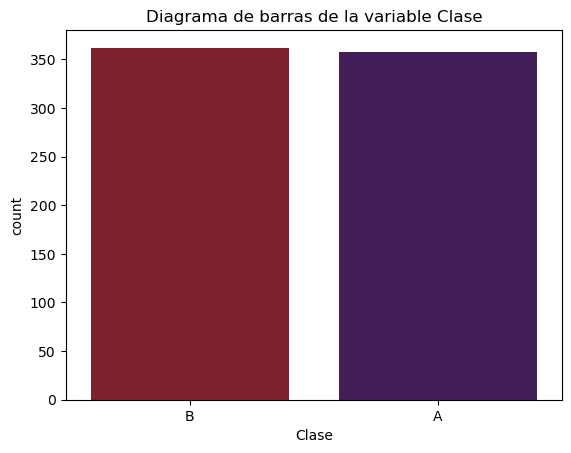

In [6]:
draw_countplot(df_raw,'Clase')

## ◽ **Descripción del dataset**
* La variable repuesta el la columna Clase
* Las variables predictoreas son Area, Emayor, Emenor, Exc, Vol,Rat y Peri

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    681 non-null    float64
 1   Emayor  686 non-null    float64
 2   Emenor  683 non-null    float64
 3   Exc     676 non-null    float64
 4   Vol     677 non-null    float64
 5   Rat     680 non-null    float64
 6   Perim   673 non-null    float64
 7   Clase   720 non-null    object 
dtypes: float64(7), object(1)
memory usage: 45.1+ KB


## ◽ **¿Como se distribuyen los datos?**


<Figure size 640x480 with 0 Axes>

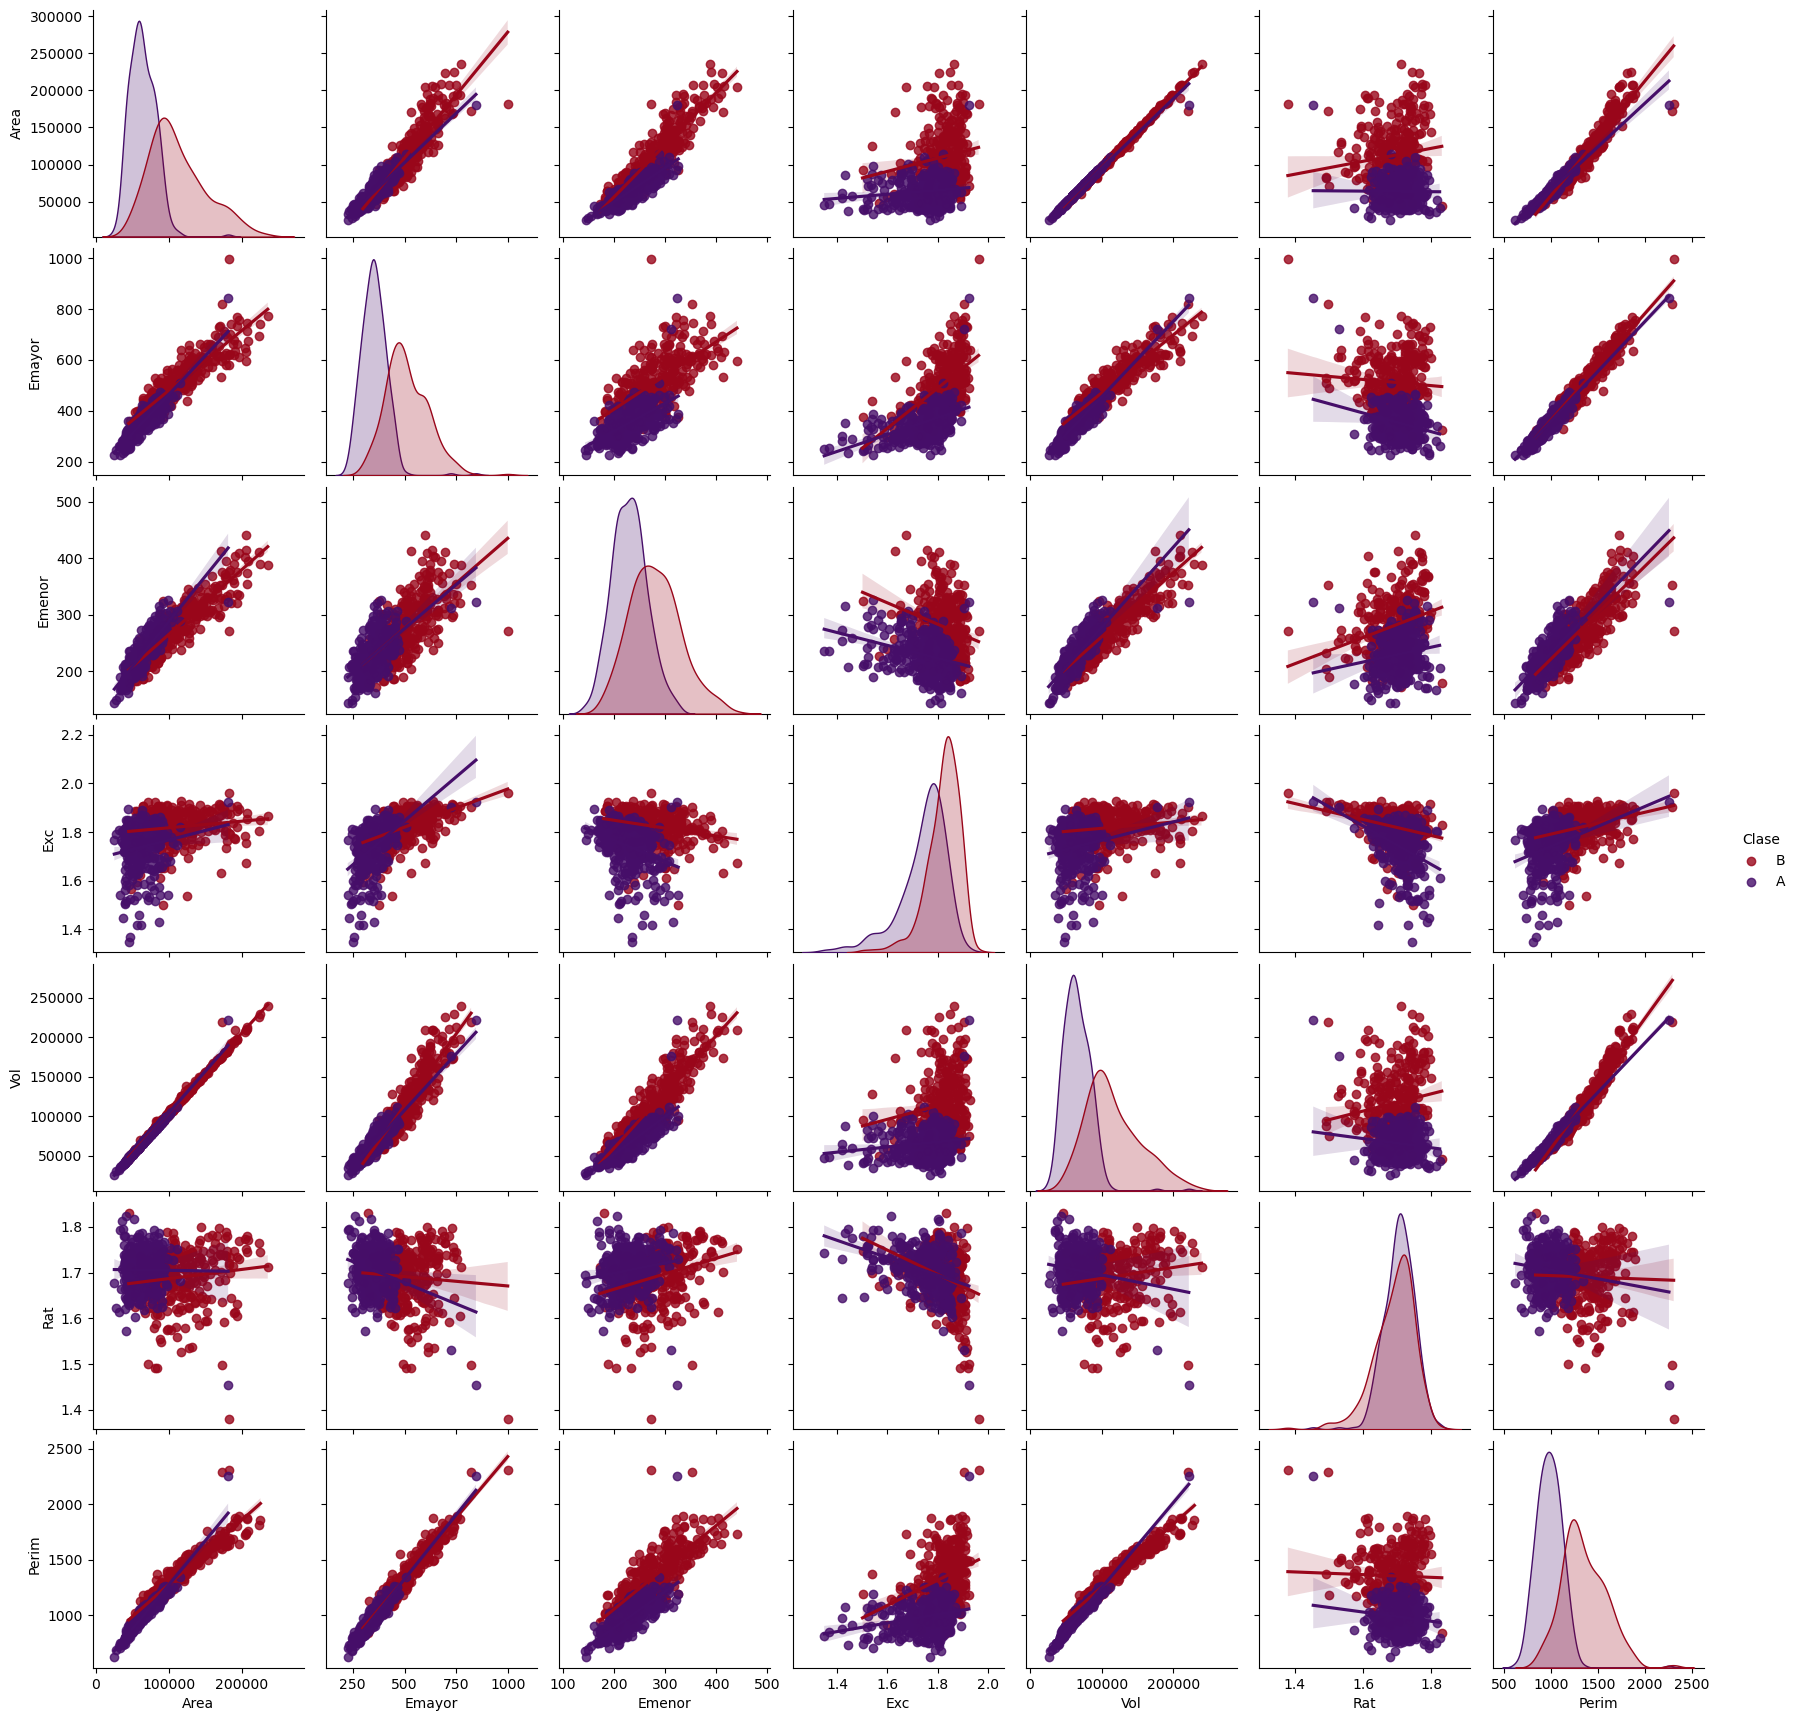

In [8]:
draw_pairplot(df_raw,style="style3")


## ◽ **Distribución de probabilidad**

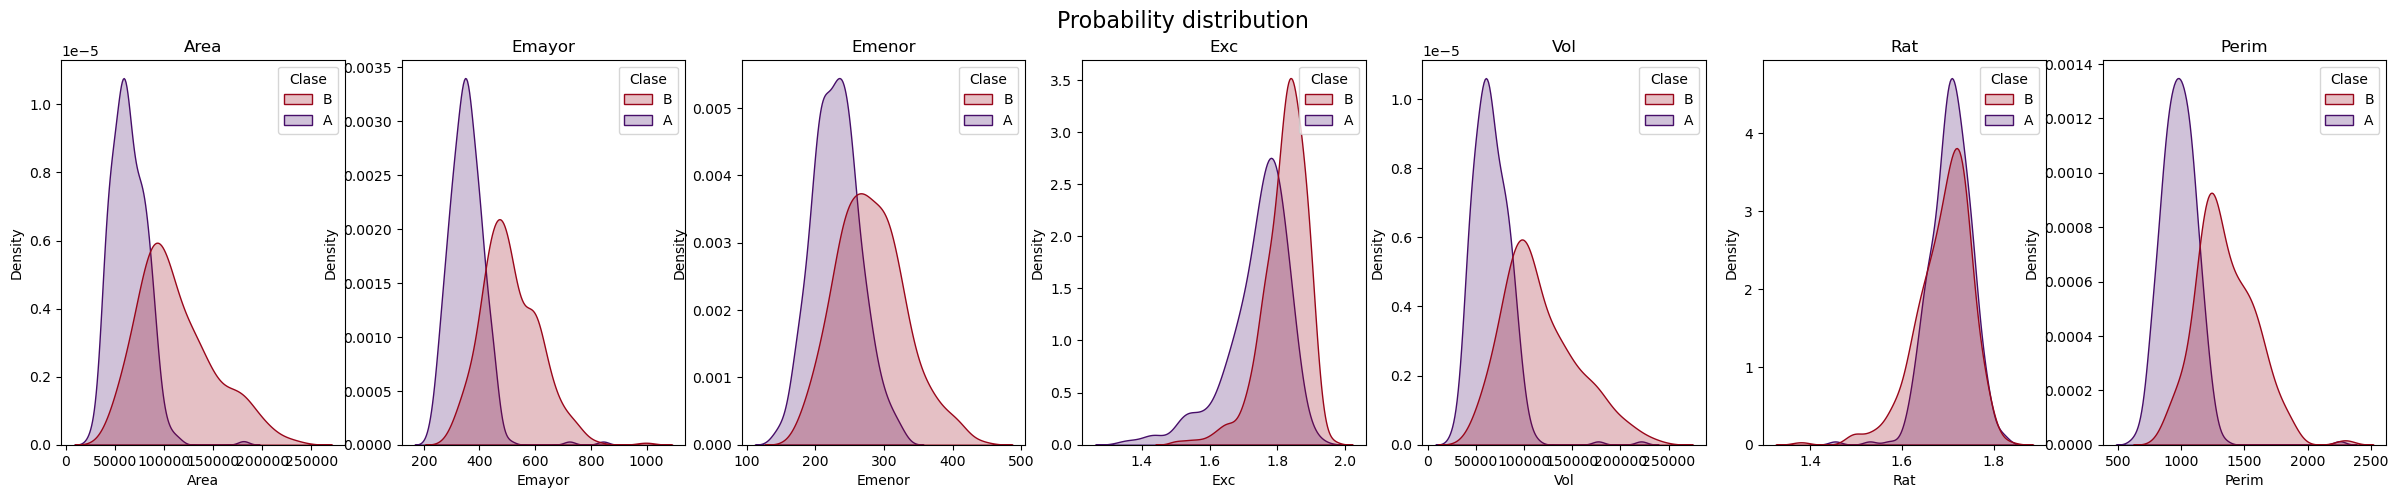

In [9]:
draw_kdeplots(df_raw)

## ◽ **Skewness and Kurtosis**


In [10]:
show_skew_and_kurtosis(df_raw)

skew  kurtosis
Area    1.157159  1.059180
Emayor  0.870055  0.789054
Emenor  0.652404  0.423626
Exc    -1.390112  2.841782
Vol     1.127781  0.979255
Rat    -1.101462  3.244730
Perim   0.812233  0.693695

## ◽ **Normal Q-Q Plot** 

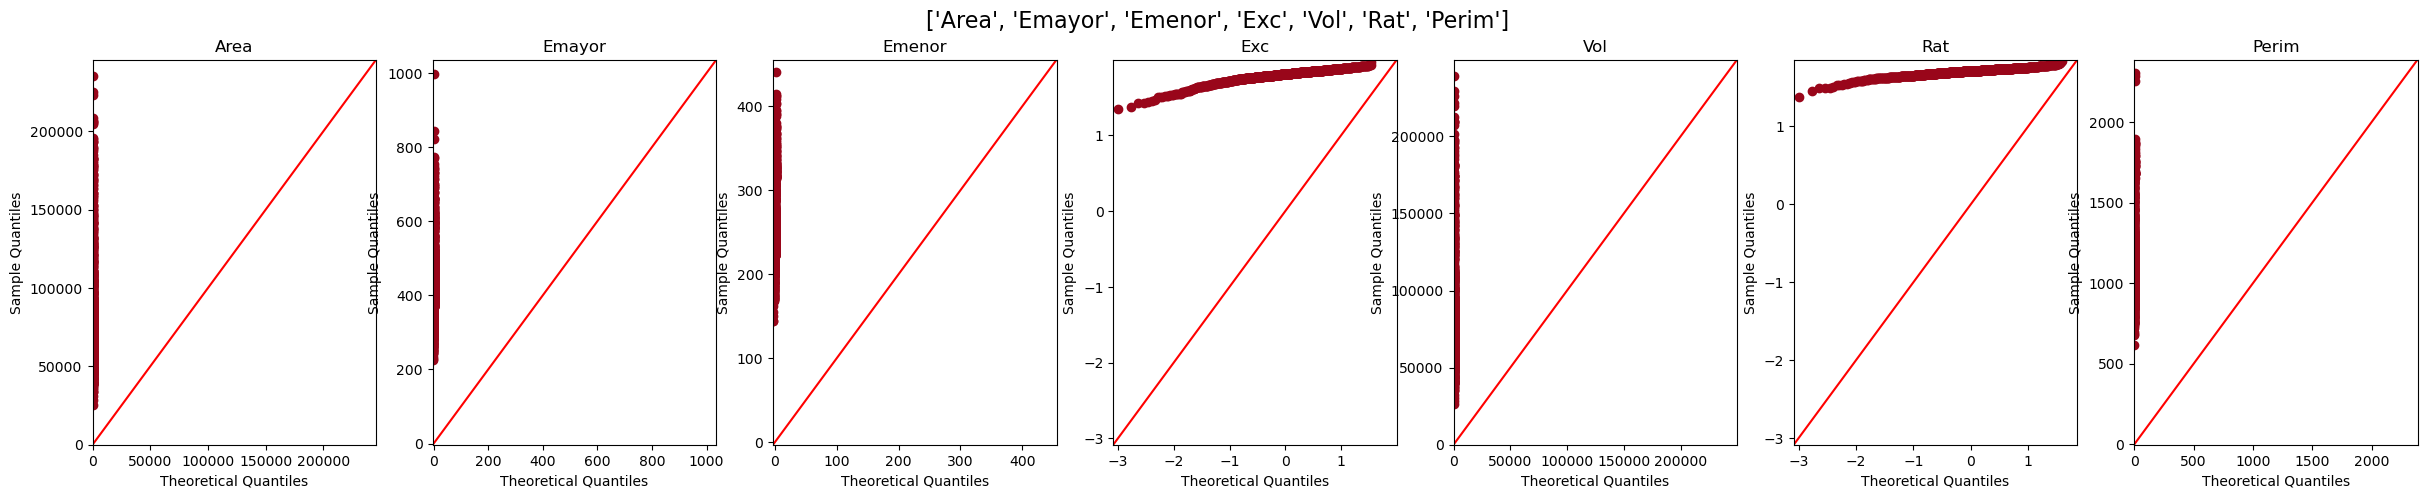

In [11]:
draw_qq_plots(df_raw)

# 💎 **Fase 2. Limpieza de los datos**

## ◽ Duplicados

In [12]:
contabilizar_registros_duplicados(df_raw)

0

## ◽ **Valores faltantes**

Existe un porcentaje de valores nulos para cada variable predictora.

In [13]:
contabilizar_valores_nulos(df_raw)

Total         %
Area       39  5.416667
Emayor     34  4.722222
Emenor     37  5.138889
Exc        44  6.111111
Vol        43  5.972222
Rat        40  5.555556
Perim      47  6.527778
Clase       0  0.000000

**Estrategia: Eliminación**

- La distribución de las variables predictoras no sigue una distribución normal. Además, existe un porcentaje entorno al 6% en cada una de las variables explicativas de valores faltantes (nan). Se eliminan los nan porque estaríamos alternando la forma de los arandanos, ya que las variables predictoras tienen una alta correlinealidad.

- En otro problema, se podría haber usando el método de imputación y se remplazan los valores faltante (nan) por el valor de la mediana de su variable correspondiente. Si la distribución hubiera sido normal, se hubieran remplazado por la media.


In [14]:
df_sin_nan = quitar_nan(df_raw) # Estrategia 1
contabilizar_valores_nulos(df_sin_nan)

Total    %
Area        0  0.0
Emayor      0  0.0
Emenor      0  0.0
Exc         0  0.0
Vol         0  0.0
Rat         0  0.0
Perim       0  0.0
Clase       0  0.0

## ◽ **Identificación de outliers**

* IQR Rango intercuartilico.
* Isolation Forest
* OneClassSVM
* DbScan
* AutoEnconders
* Biclustering


**Metodo visual: boxplot**

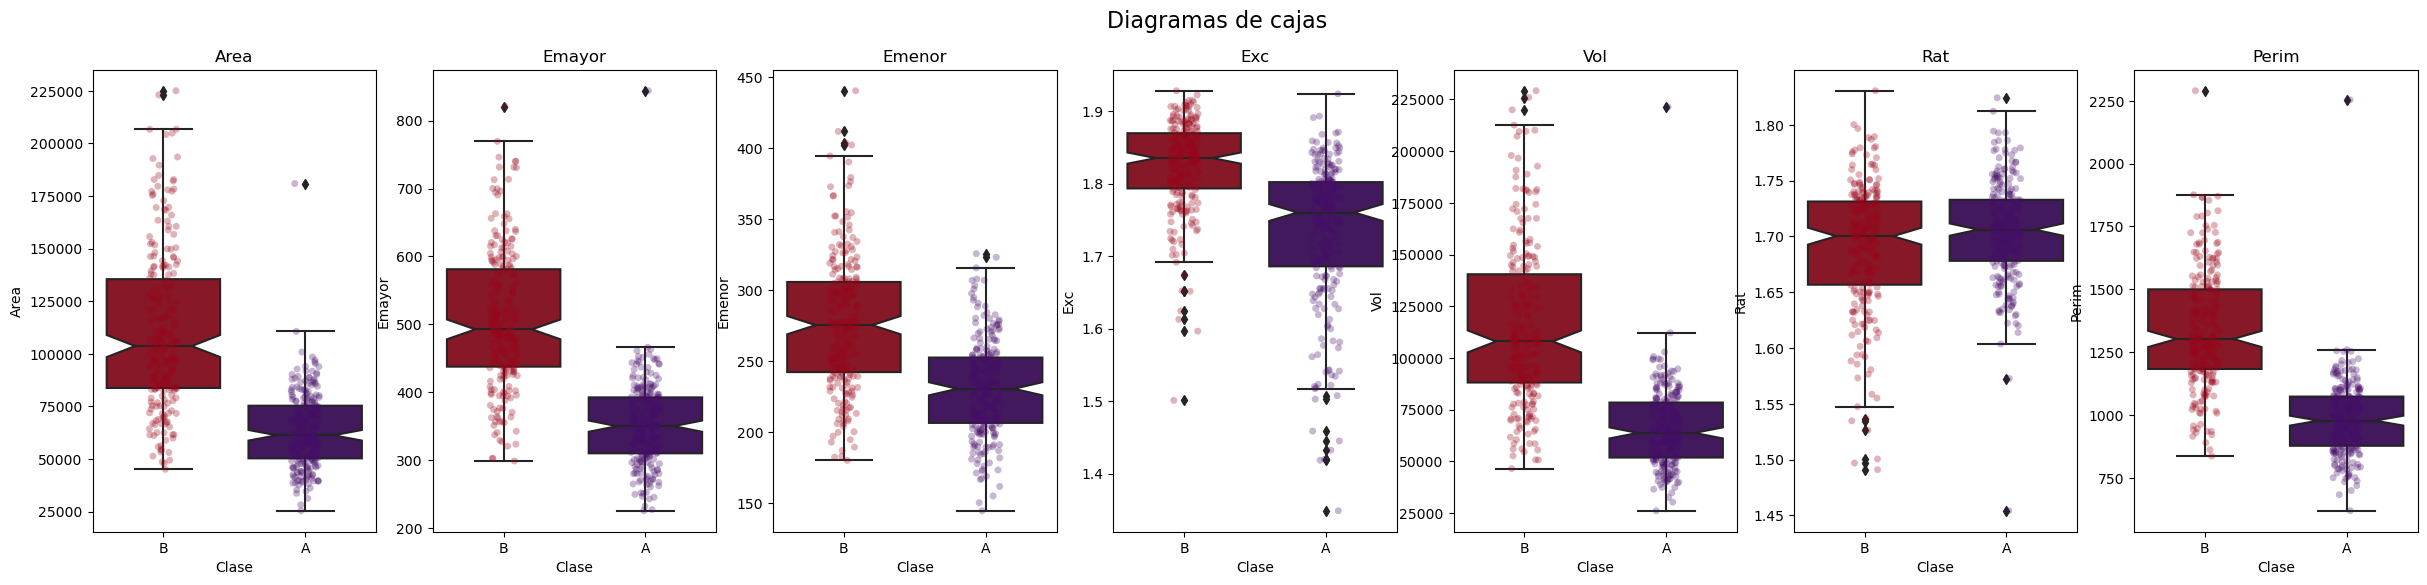

In [15]:
draw_boxplots(df_sin_nan)

**Matrix de correlación**

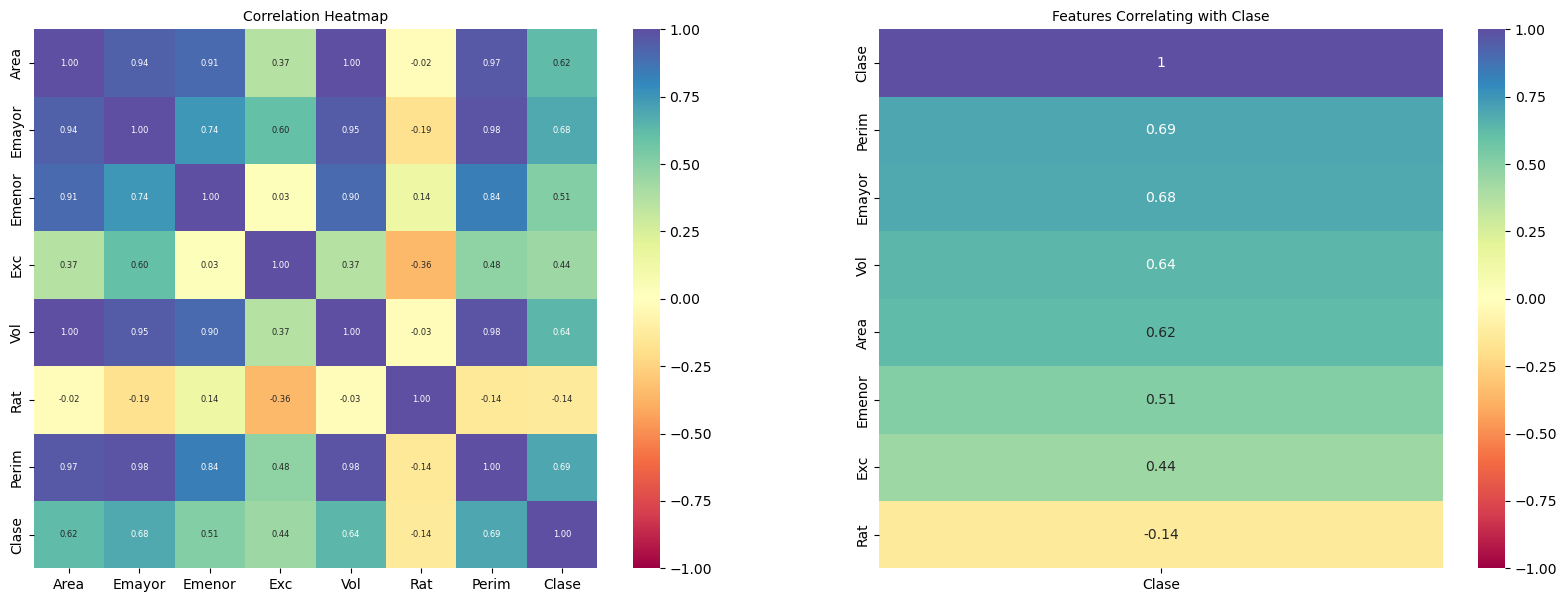

In [16]:
analisis_correlacion(df_raw,'Spectral')

**Metodo: IQR Rango intercuartilico**

In [17]:
df_selec = df_sin_nan.copy() 
print(df_selec.shape)

(484, 8)


In [19]:
# Quitando valores outlier con el rango intercuartilico
q1 = df_selec.quantile(0.25) # 1er Cuartil
q3 = df_selec.quantile(0.75) # 3er Cuartil
iqr = q3 -q1
print(iqr)

Area      45251.750000
Emayor      147.034542
Emenor       63.377495
Exc           0.101864
Vol       47514.250000
Rat           0.063779
Perim       337.950750
dtype: float64


In [20]:
# Outliers
df_outliers = df_selec[((df_selec < (q1 - 1.5 * iqr)) |(df_selec > (q3 + 1.5 * iqr))).any(axis=1)]
print(df_outliers.shape)
df_outliers.tail()


(61, 8)


Area      Emayor      Emenor       Exc       Vol       Rat     Perim  \
684  127292.0  639.850635  258.381945  1.914840  129101.0  1.534715  1496.062   
685  178334.0  626.064174  366.237050  1.811045  181715.0  1.789452  1630.704   
686  177916.0  581.709750  394.524708  1.734863  181352.0  1.737207  1647.505   
708  206720.0  713.472549  373.642544  1.851905  210114.0  1.780576  1866.091   
715   86545.0  350.127874  315.719520  1.432307   87512.0  1.785887  1070.062   

    Clase  
684     B  
685     B  
686     B  
708     B  
715     A

In [21]:
# Dataset sin outliers
df_sin_outliers = df_selec[~((df_selec < (q1 - 1.5 * iqr)) |(df_selec > (q3 + 1.5 * iqr))).any(axis=1)]
print(df_sin_outliers.shape)
df_sin_outliers.head()

(423, 8)


Area      Emayor      Emenor       Exc       Vol       Rat     Perim  \
0  100928.0  465.179920  287.015714  1.786964  105549.0  1.686193  1310.510   
1   77622.0  460.142902  226.581322  1.870360   82990.0  1.651213  1205.141   
2   57612.0  352.441365  210.064210  1.802965   58810.0  1.647719   934.684   
3   75166.0  406.690687  243.032436  1.801805   78789.0  1.684130  1121.786   
4   80437.0  449.454581  232.325506  1.856043   84460.0  1.674236  1176.305   

  Clase  
0     B  
1     B  
2     A  
3     A  
4     A

Text(0.5, 1.0, 'Sin Outliers: 423')

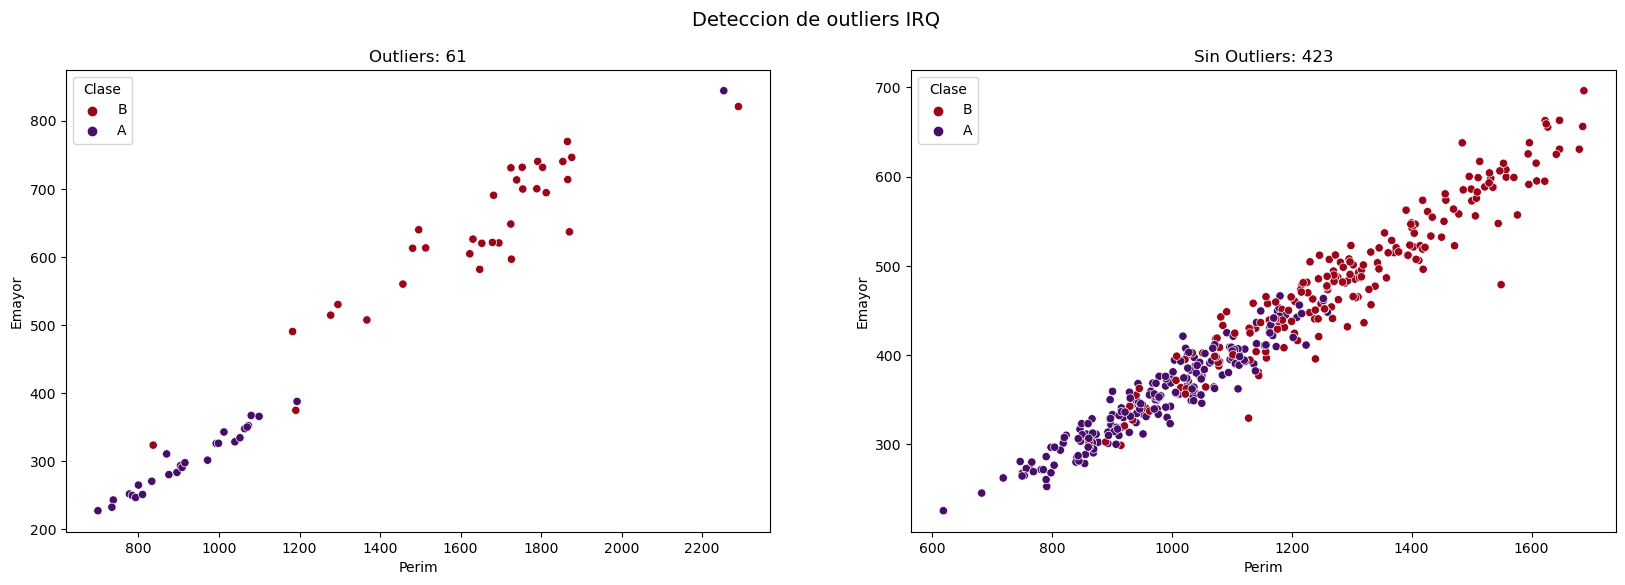

In [23]:
fig, axes = plt.subplots(1, 2,  figsize=(20, 6))
fig.suptitle("Deteccion de outliers IRQ",fontsize=14)

sns.scatterplot(ax = axes[0], data=df_outliers, x='Perim', y='Emayor', hue='Clase')
axes[0].set_title("Outliers: {}".format(df_outliers.shape[0]))

sns.scatterplot(ax = axes[1], data=df_sin_outliers, x='Perim', y='Emayor', hue='Clase')
axes[1].set_title("Sin Outliers: {}".format(df_sin_outliers.shape[0]))


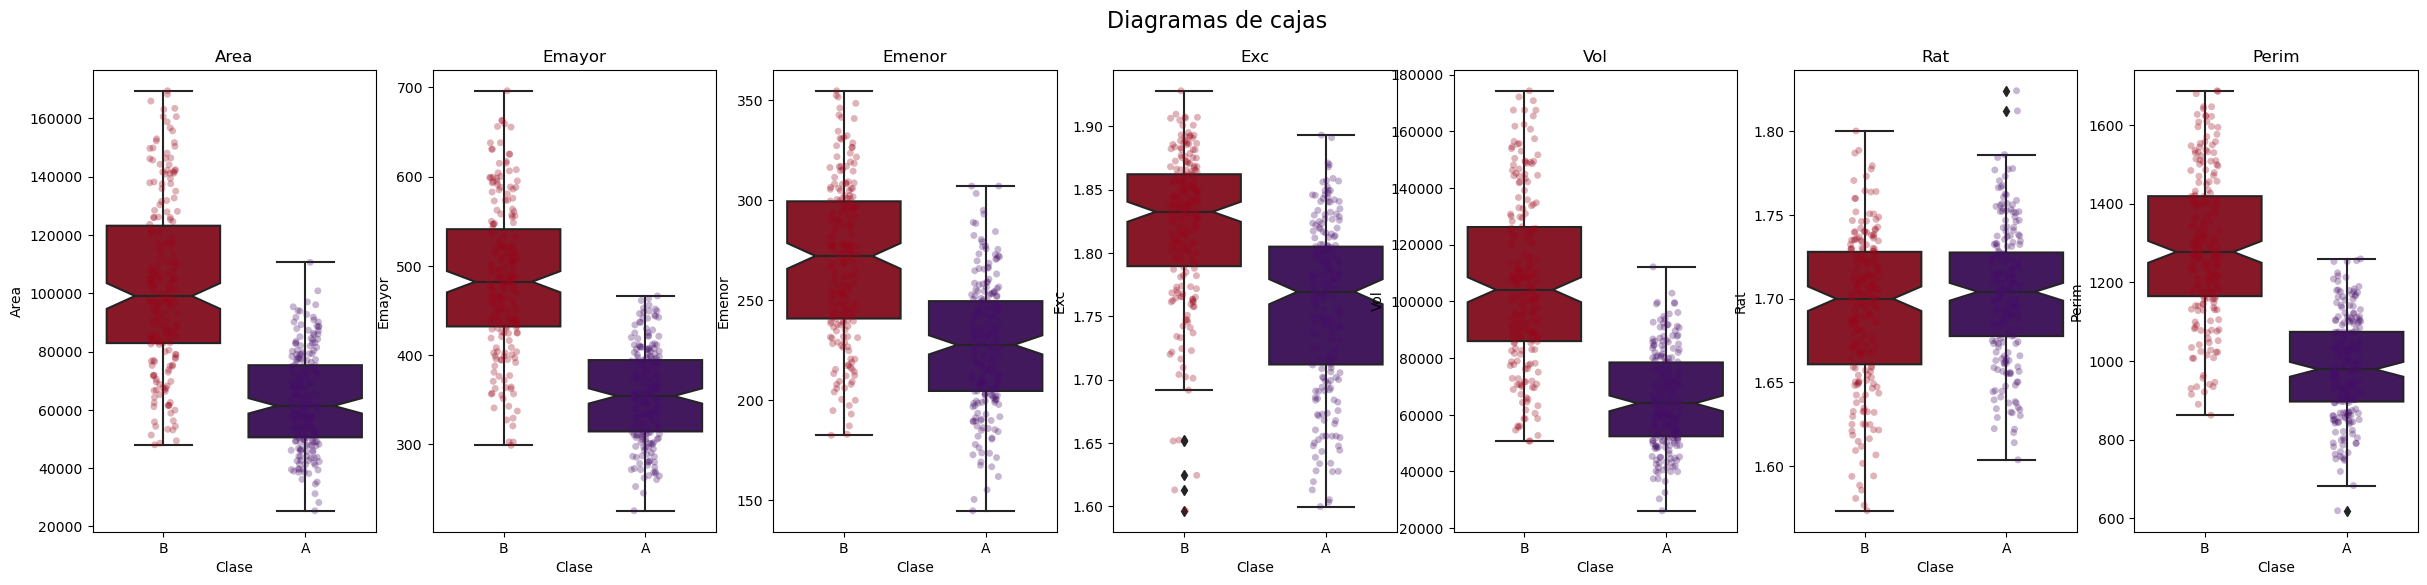

In [24]:
draw_boxplots(df_sin_outliers)

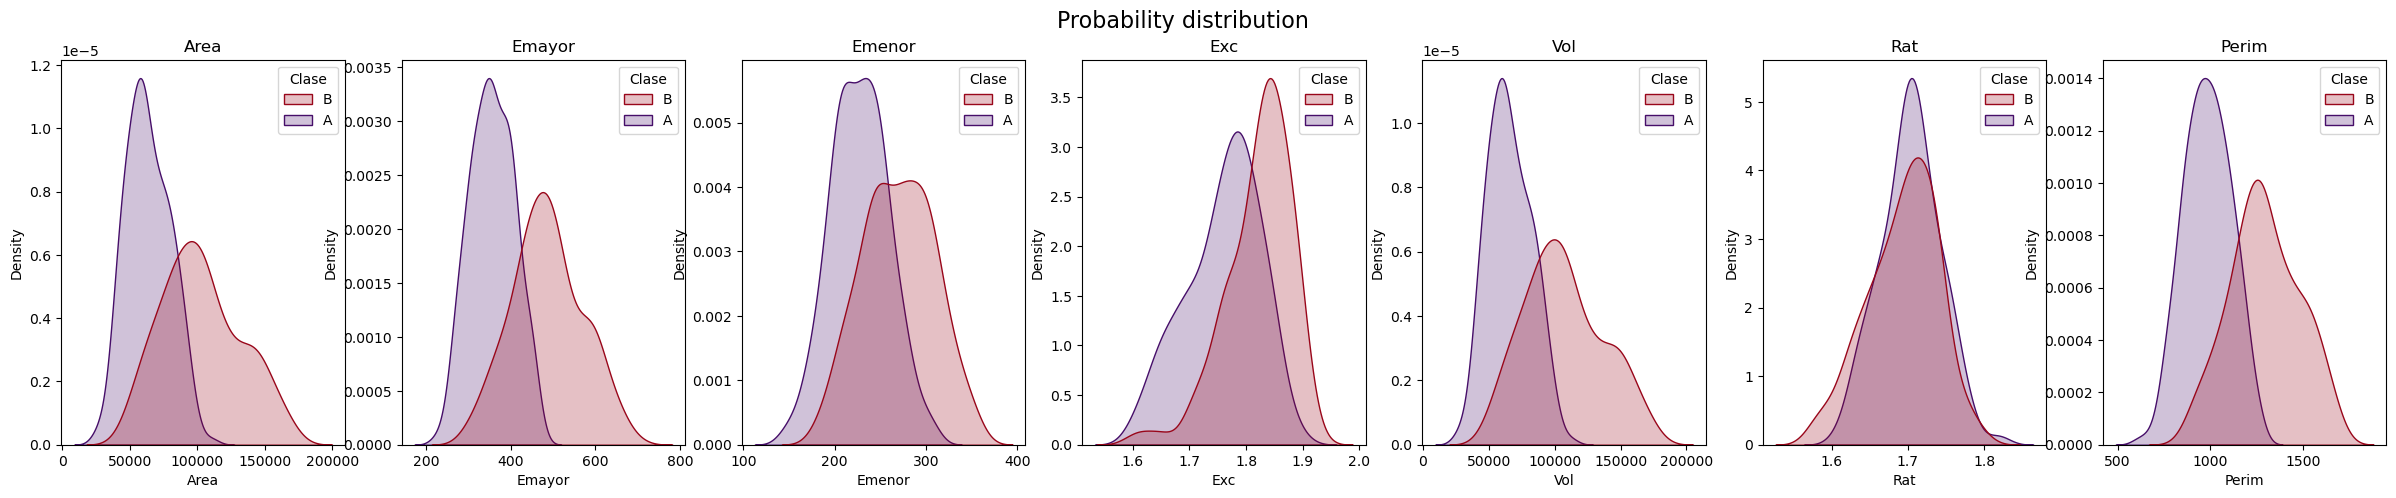

In [ ]:
draw_kdeplots(df_sin_outliers)

In [25]:
df_sin_outliers.isna().sum()

Area      0
Emayor    0
Emenor    0
Exc       0
Vol       0
Rat       0
Perim     0
Clase     0
dtype: int64

**Metodo: Isolation Forest**

In [26]:
from sklearn.ensemble import IsolationForest

X = df_sin_outliers.drop(columns=['Clase']) 
y = df_sin_outliers['Clase']
print("puntos:",df_sin_outliers.shape)


# Creamos el modelo
clf = IsolationForest(n_estimators=20, warm_start=True)
clf.fit(X)
# Predict anomalies
y_anomalies = clf.predict(X)


puntos: (423, 8)


In [27]:
print("puntos anomalos segun el Isolation Forest:",list(y_anomalies).count(-1)) # Segun el Isolation Forest habria 93 puntos anomalos
df_isolation = X.copy()
df_isolation['anomalia'] =y_anomalies
df_isolation['Clase'] = y
df_isolation.head()

puntos anomalos segun el Isolation Forest: 94


Area      Emayor      Emenor       Exc       Vol       Rat     Perim  \
0  100928.0  465.179920  287.015714  1.786964  105549.0  1.686193  1310.510   
1   77622.0  460.142902  226.581322  1.870360   82990.0  1.651213  1205.141   
2   57612.0  352.441365  210.064210  1.802965   58810.0  1.647719   934.684   
3   75166.0  406.690687  243.032436  1.801805   78789.0  1.684130  1121.786   
4   80437.0  449.454581  232.325506  1.856043   84460.0  1.674236  1176.305   

   anomalia Clase  
0         1     B  
1         1     B  
2         1     A  
3         1     A  
4         1     A

Text(0.5, 1.0, 'Inicio')

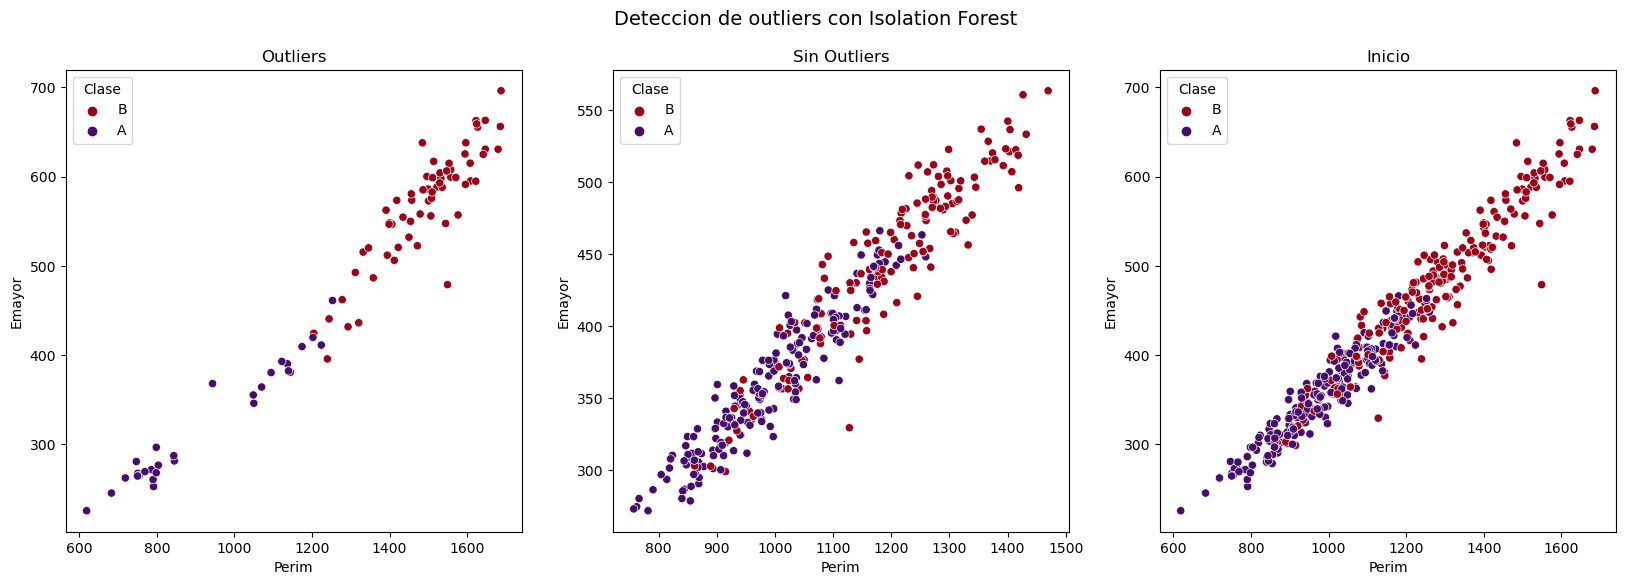

In [28]:
fig, axes = plt.subplots(1, 3,  figsize=(20, 6))
fig.suptitle("Deteccion de outliers con Isolation Forest",fontsize=14)

sns.scatterplot(ax = axes[0], data=df_isolation[(df_isolation.anomalia == -1)], x='Perim', y='Emayor', hue='Clase')
axes[0].set_title("Outliers")

sns.scatterplot(ax = axes[1], data=df_isolation[(df_isolation.anomalia == 1)], x='Perim', y='Emayor', hue='Clase')
axes[1].set_title("Sin Outliers")

sns.scatterplot(ax = axes[2], data=df_sin_outliers, x='Perim', y='Emayor', hue='Clase')
axes[2].set_title("Inicio")

# 💭 Dataset Overview

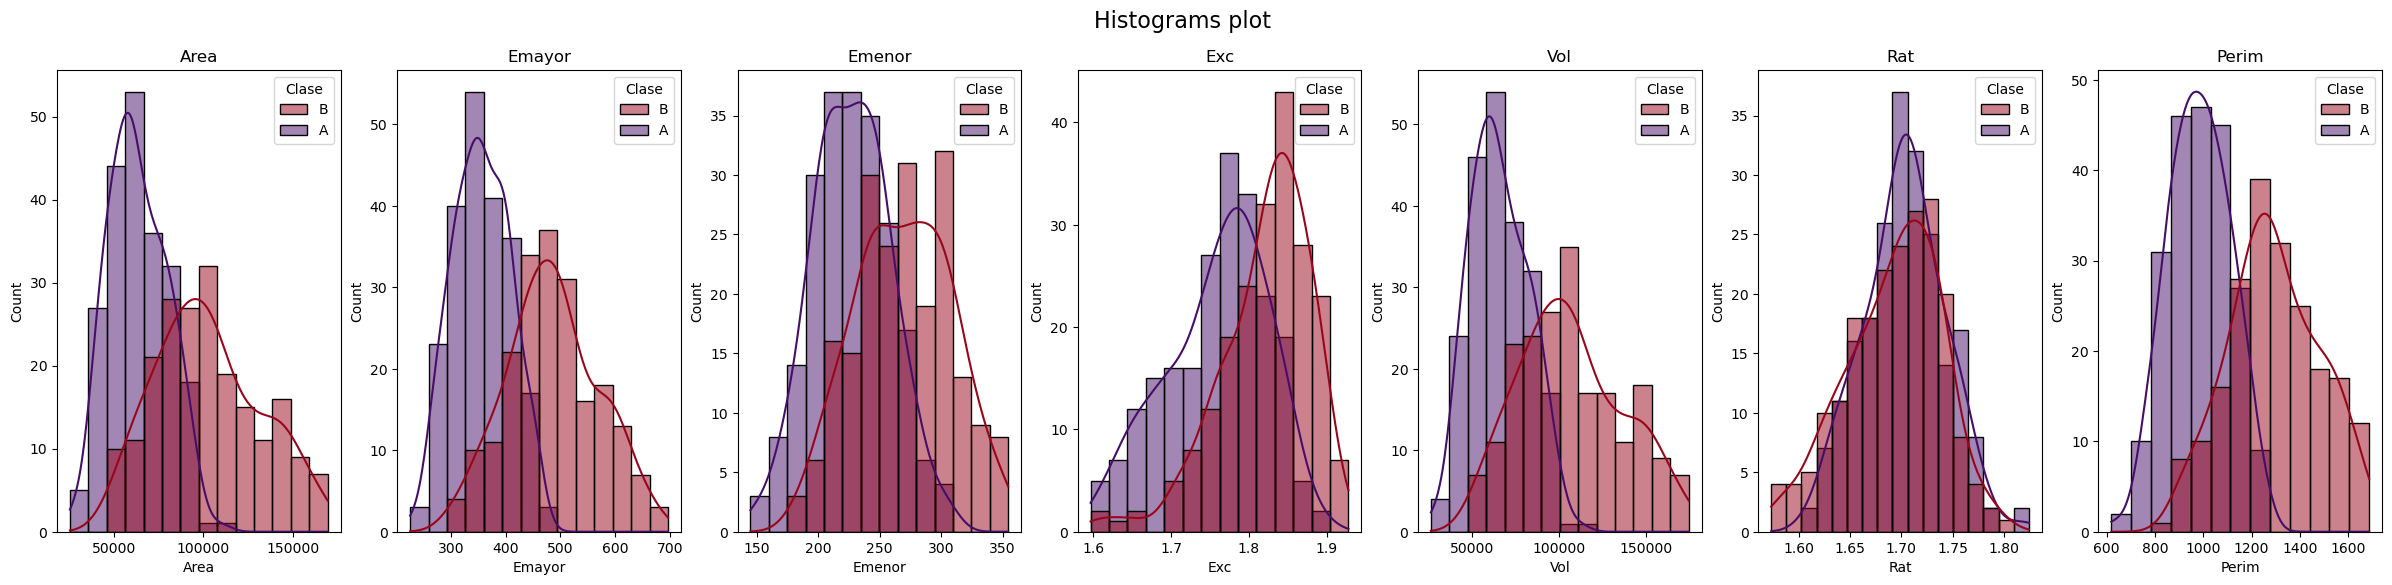

In [29]:
draw_histplots(df_sin_outliers) 

In [ ]:
df_sin_outliers.describe().T

count          mean           std           min           25%  \
Area    423.0  82445.865248  30603.104783  25387.000000  58666.000000   
Emayor  423.0    418.922893     94.505980    225.629541    348.953784   
Emenor  423.0    247.656408     41.099319    144.618672    216.460194   
Exc     423.0      1.789077      0.069347      1.596359      1.747051   
Vol     423.0  85484.115839  31494.749989  26139.000000  60571.000000   
Rat     423.0      1.697970      0.042962      1.573242      1.670595   
Perim   423.0   1133.824277    221.616433    619.074000    962.858500   

                 50%            75%            max  
Area    77310.000000   98362.000000  169494.000000  
Emayor    404.316394     480.921458     696.149046  
Emenor    244.803889     275.548631     354.584606  
Exc         1.800108       1.841224       1.928094  
Vol     80285.000000  102890.000000  174282.000000  
Rat         1.702860       1.727946       1.824319  
Perim    1105.042000    1272.872000    1687.178000

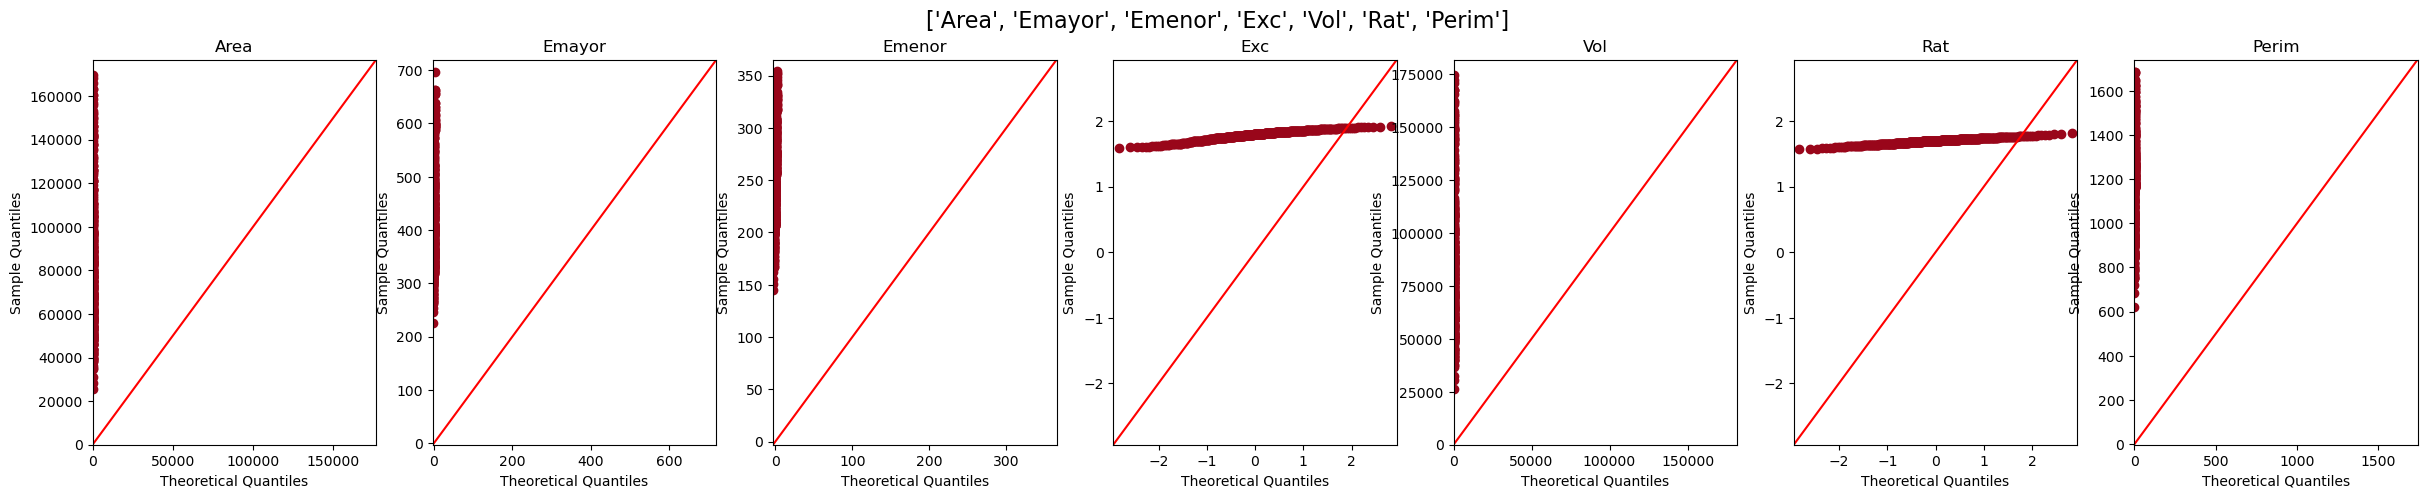

In [30]:
draw_qq_plots(df_sin_outliers) 

In [31]:
show_skew_and_kurtosis(df_sin_outliers) 

skew  kurtosis
Area    0.769034  0.009354
Emayor  0.539407 -0.293369
Emenor  0.251378 -0.392472
Exc    -0.603576 -0.154965
Vol     0.754136 -0.035302
Rat    -0.263829 -0.011196
Perim   0.428334 -0.456457

Los datos tienen algo de kurtosis y skew, pero tras la eliminación de los valores faltantes y los puntos atípicos siguiendo el método del IRQ se ha reducido bastante en algunas variables.

<Figure size 640x480 with 0 Axes>

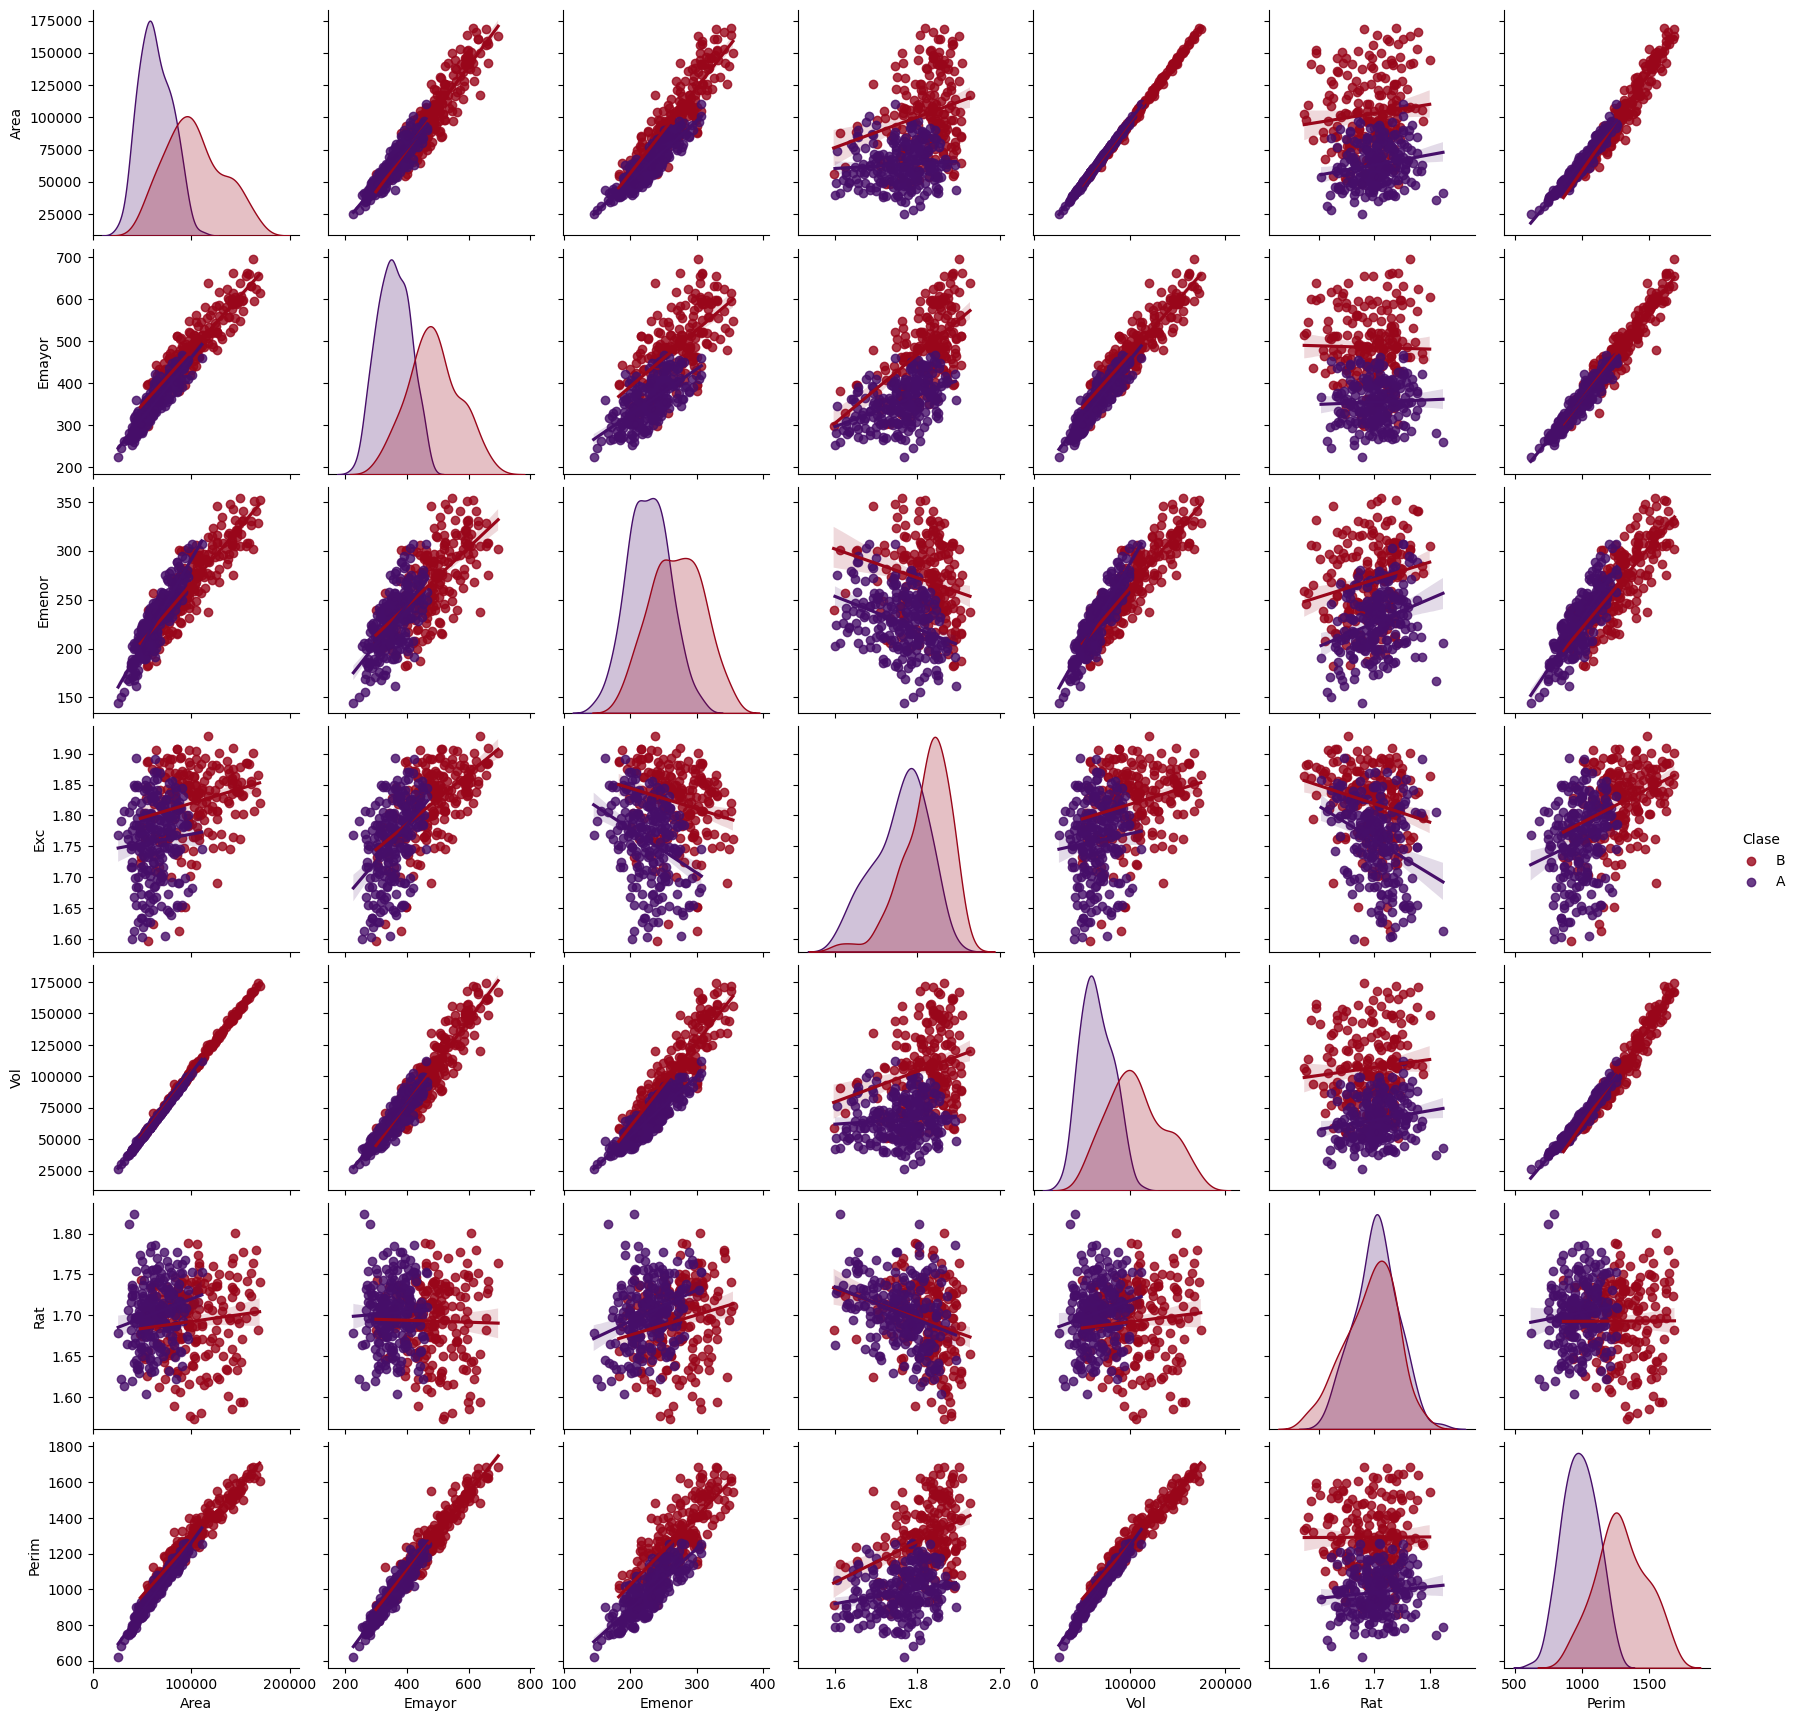

In [32]:
draw_pairplot(df_sin_outliers,style="style3")

In [ ]:
df_sin_outliers.isna().sum()

Area      0
Emayor    0
Emenor    0
Exc       0
Vol       0
Rat       0
Perim     0
Clase     0
dtype: int64

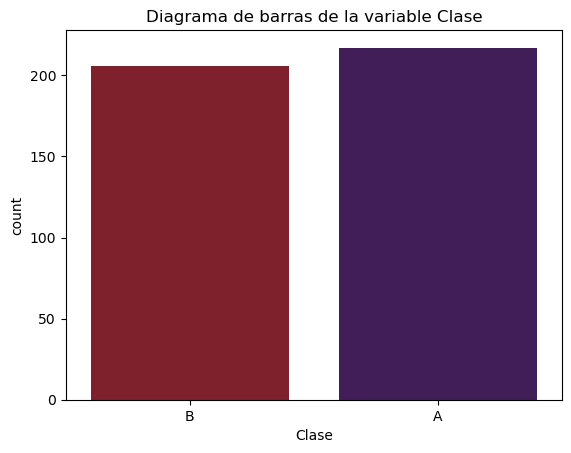

In [34]:
draw_countplot(df_sin_outliers,'Clase')

# 📋 Fase 3. Seleccion de caracteristicas

## ◽  **Importancia de caracteristicas**

In [35]:
df_selec = df_sin_outliers.copy()

X = df_selec.drop(columns=['Clase']) # Eliminamos esta variable
y = df_selec['Clase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [37]:
rf = RandomForestClassifier(criterion = 'entropy', n_estimators =10)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

<BarContainer object of 7 artists>

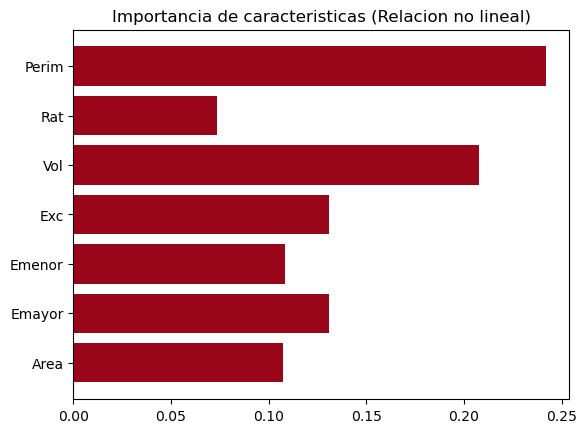

In [38]:
plt.title("Importancia de caracteristicas (Relacion no lineal)")
plt.barh(X.columns, rf.feature_importances_)

## ◽  **Análisis correlación**

* La correlación de **pearson** (es paramétrico, y requiere que se cumpla el supuesto de normalidad en las variables) 
* La correlación de **spearman** (es no paramétrico, pues la distribución muestral no se ajusta a una distribución conocida)

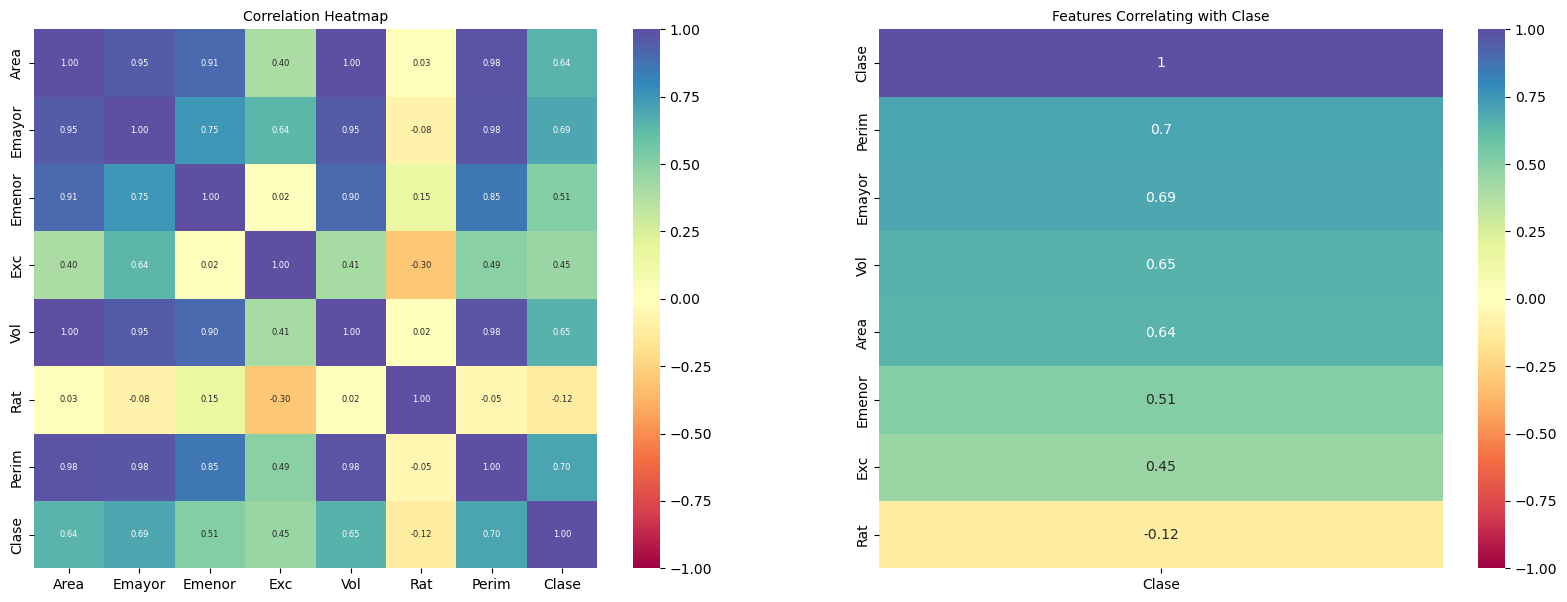

In [39]:
analisis_correlacion(df_selec,'Spectral')

# 🎯 Fase 4.Modelos

* **Seleccion de variables**
Se ha decidido no eliminar variables predictoras, ya que el analisis de la correlación y la importancia de características no indica claramente que debamos hacerlo.

In [40]:
print(df_selec.shape)
df_selec.head()

(423, 8)


Area      Emayor      Emenor       Exc       Vol       Rat     Perim  \
0  100928.0  465.179920  287.015714  1.786964  105549.0  1.686193  1310.510   
1   77622.0  460.142902  226.581322  1.870360   82990.0  1.651213  1205.141   
2   57612.0  352.441365  210.064210  1.802965   58810.0  1.647719   934.684   
3   75166.0  406.690687  243.032436  1.801805   78789.0  1.684130  1121.786   
4   80437.0  449.454581  232.325506  1.856043   84460.0  1.674236  1176.305   

  Clase  
0     B  
1     B  
2     A  
3     A  
4     A

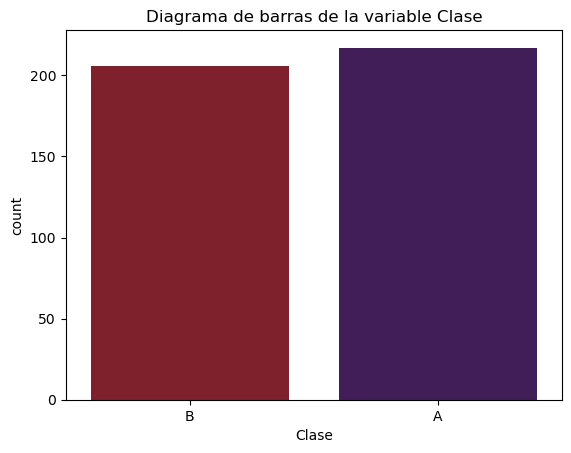

In [42]:
draw_countplot(df_selec)

In [43]:
df_selec.describe().T

count          mean           std           min           25%  \
Area    423.0  82445.865248  30603.104783  25387.000000  58666.000000   
Emayor  423.0    418.922893     94.505980    225.629541    348.953784   
Emenor  423.0    247.656408     41.099319    144.618672    216.460194   
Exc     423.0      1.789077      0.069347      1.596359      1.747051   
Vol     423.0  85484.115839  31494.749989  26139.000000  60571.000000   
Rat     423.0      1.697970      0.042962      1.573242      1.670595   
Perim   423.0   1133.824277    221.616433    619.074000    962.858500   

                 50%            75%            max  
Area    77310.000000   98362.000000  169494.000000  
Emayor    404.316394     480.921458     696.149046  
Emenor    244.803889     275.548631     354.584606  
Exc         1.800108       1.841224       1.928094  
Vol     80285.000000  102890.000000  174282.000000  
Rat         1.702860       1.727946       1.824319  
Perim    1105.042000    1272.872000    1687.178000

* **Training & Test datasets**

In [44]:
# Variables predictoras
X = df_selec.iloc[:,df_selec.columns !='Clase']
print("Variables predictoras:",X.columns)

# Variable target
y =  LabelEncoder().fit_transform(df_selec['Clase'])

print(X.shape)
print(y.shape)


Variables predictoras: Index(['Area', 'Emayor', 'Emenor', 'Exc', 'Vol', 'Rat', 'Perim'], dtype='object')
(423, 7)
(423,)


* **Criterio separación de los datos:  70% Train 30% Test** 

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle = True, random_state = 0)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(296, 7)
(296,)
(127, 7)
(127,)


* **Standardization** 

Standarization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:
* mean=0 
* standard deviation = 1

In [46]:
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

## 💡. Decision Tree

* **Modelo optimizado**

In [47]:
dtree = DecisionTreeClassifier(random_state=0)

# Busqueda del mejor estimador
param_grid = {'max_depth' : [2,3,4,5,6,7],'criterion' :['gini', 'entropy','log_loss'], 'splitter':["best","random"]}
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5)
grid_search.fit(x_train_std, y_train)

# Entrenamiento del estimador optimo
dtree_final_model = grid_search.best_estimator_
dtree_final_model.fit(x_train_std, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

[Text(0.5, 0.8333333333333334, 'Emayor <= 0.127\ngini = 0.499\nsamples = 296\nvalue = [155, 141]\nclass = A'),
 Text(0.25, 0.5, 'Perim <= 0.042\ngini = 0.308\nsamples = 179\nvalue = [145, 34]\nclass = A'),
 Text(0.125, 0.16666666666666666, 'gini = 0.254\nsamples = 161\nvalue = [137, 24]\nclass = A'),
 Text(0.375, 0.16666666666666666, 'gini = 0.494\nsamples = 18\nvalue = [8, 10]\nclass = B'),
 Text(0.75, 0.5, 'Emayor <= 0.574\ngini = 0.156\nsamples = 117\nvalue = [10, 107]\nclass = B'),
 Text(0.625, 0.16666666666666666, 'gini = 0.388\nsamples = 38\nvalue = [10, 28]\nclass = B'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 79\nvalue = [0, 79]\nclass = B')]

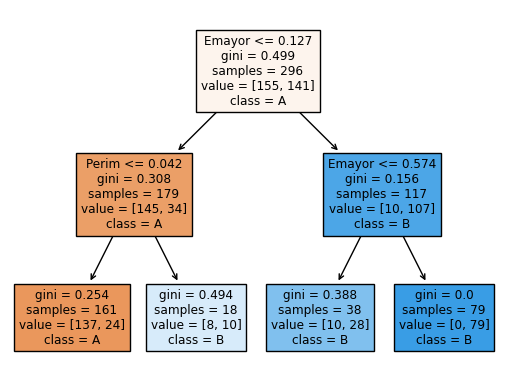

In [48]:
from sklearn import tree

fn = X.columns #['Perim','Emayor']
cn =['A','B'] 
tree.plot_tree(dtree_final_model,feature_names=fn, class_names=cn,filled = True)

* **Evaluación del modelo**

In [49]:
y_preds_train = dtree_final_model.predict(x_train_std)
y_preds_test = dtree_final_model.predict(x_test_std)

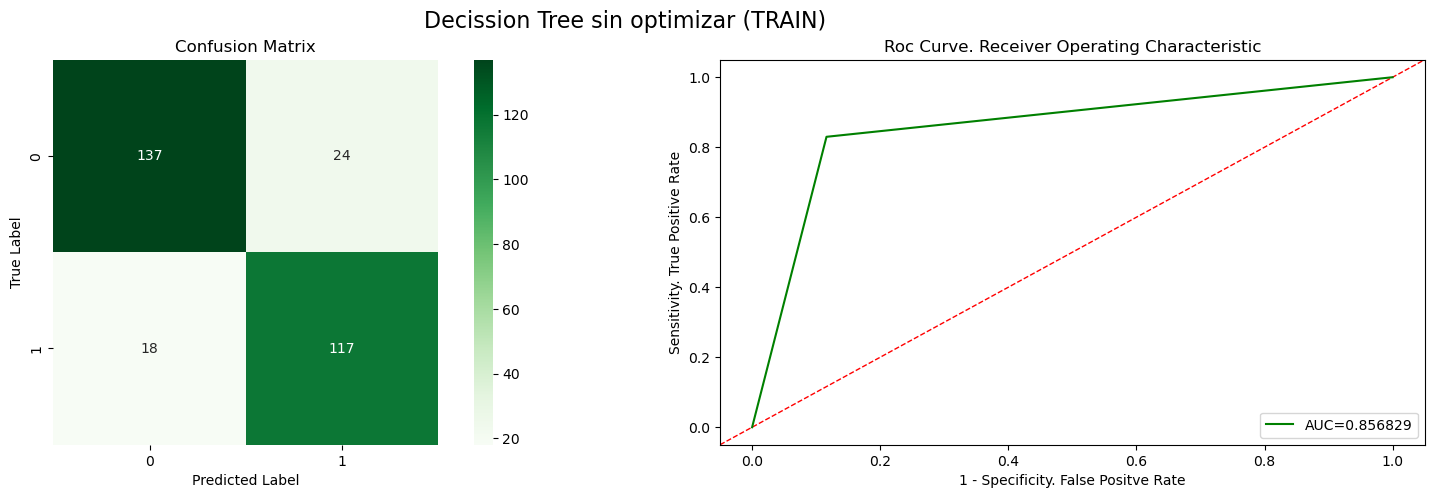

METRICS Decission Tree sin optimizar (TRAIN)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8581081081081081
(precision) P= TP / TP + FP). precision_score 0.8666666666666667
(sensibilidad) R = TP / (TP + FN). recall_score 0.8297872340425532
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8478260869565217
(Area Under Curve) AUC: 0.8568291008922444


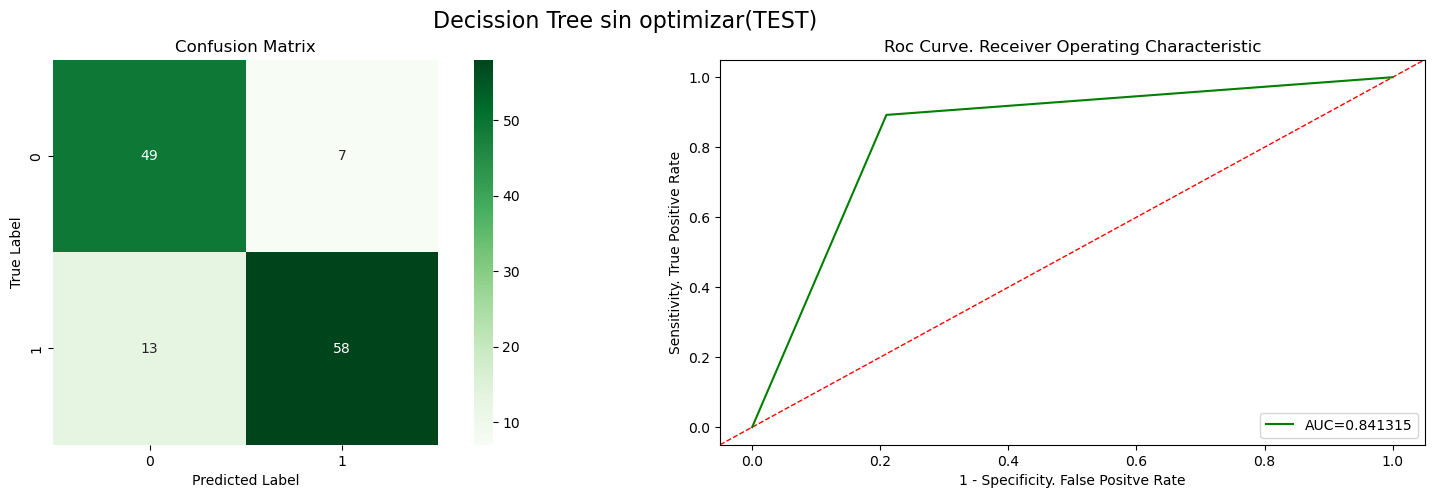

METRICS Decission Tree sin optimizar(TEST)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.84251968503937
(precision) P= TP / TP + FP). precision_score 0.8169014084507042
(sensibilidad) R = TP / (TP + FN). recall_score 0.8923076923076924
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8529411764705882
(Area Under Curve) AUC: 0.8413151364764268


In [50]:
draw_cm_and_roc_curve(y_preds_train, y_train,"Decission Tree sin optimizar (TRAIN)")
draw_cm_and_roc_curve(y_preds_test, y_test,"Decission Tree sin optimizar(TEST)")

In [53]:
y_preds_train_prob = dtree_final_model.predict_proba(x_train_std)[:,-1]
y_preds_test_prob = dtree_final_model.predict_proba(x_test_std)[:,-1]

In [55]:
import pickle
filename = 'models/arandanos_model_dtree.pkl'
pickle.dump(dtree_final_model, open(filename,'wb'))

##  💡. HistGradientBoostingClassifier

* **Modelo sin optimizar**

In [56]:
xgdtree = HistGradientBoostingClassifier(random_state=0)
xgdtree.fit(x_train_std, y_train)

HistGradientBoostingClassifier(random_state=0)

* **Evaluación del modelo**

In [57]:
y_preds_train_xg = xgdtree.predict(x_train_std)
y_preds_test_xg = xgdtree.predict(x_test_std)

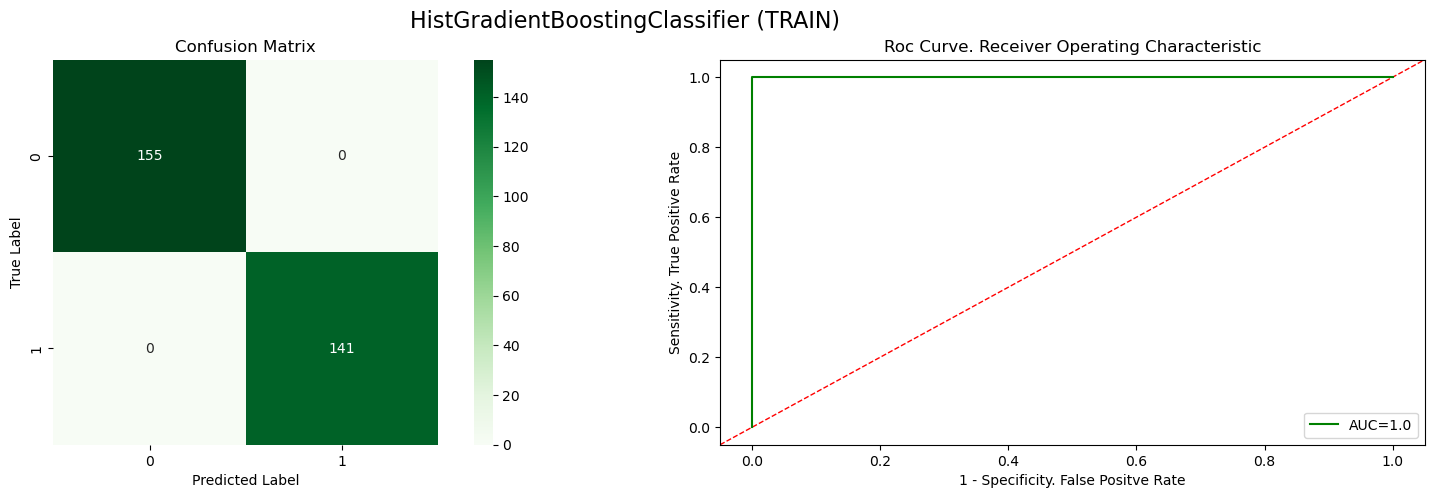

METRICS HistGradientBoostingClassifier (TRAIN)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 1.0
(precision) P= TP / TP + FP). precision_score 1.0
(sensibilidad) R = TP / (TP + FN). recall_score 1.0
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 1.0
(Area Under Curve) AUC: 1.0


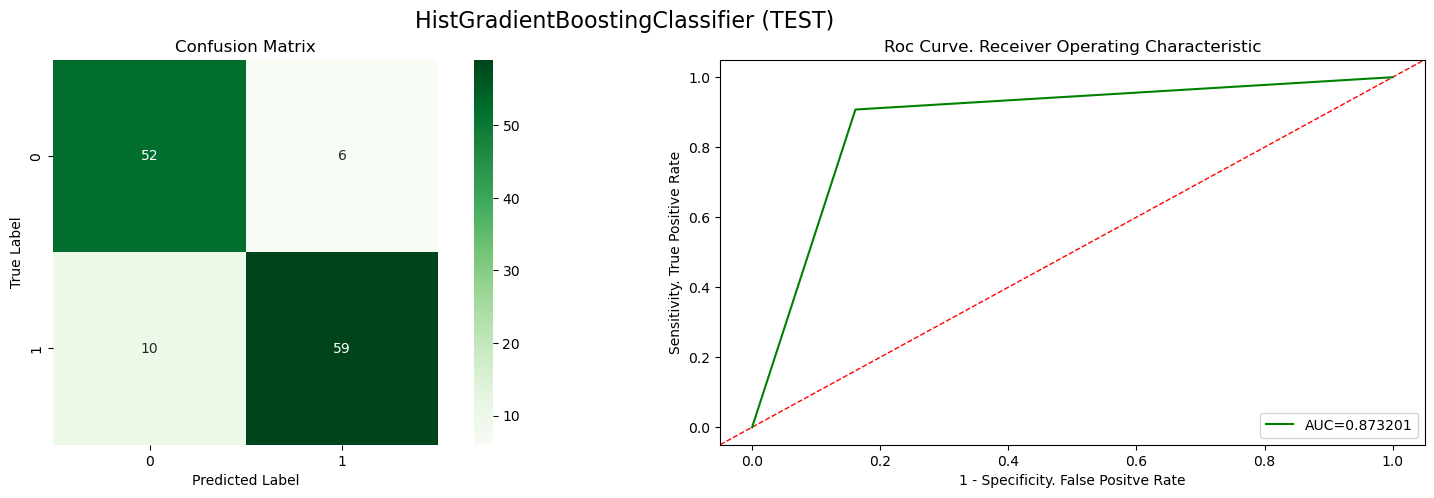

METRICS HistGradientBoostingClassifier (TEST)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8740157480314961
(precision) P= TP / TP + FP). precision_score 0.855072463768116
(sensibilidad) R = TP / (TP + FN). recall_score 0.9076923076923077
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8805970149253731
(Area Under Curve) AUC: 0.8732009925558312


In [58]:
draw_cm_and_roc_curve(y_preds_train_xg, y_train,"HistGradientBoostingClassifier (TRAIN)")
draw_cm_and_roc_curve(y_preds_test_xg, y_test,"HistGradientBoostingClassifier (TEST)")

In [60]:
y_preds_train_xgdtree_prob = xgdtree.predict_proba(x_train_std)[:,-1]
y_preds_test_xgdtree_prob = xgdtree.predict_proba(x_test_std)[:,-1]

In [61]:
import pickle
filename = 'models/arandanos_xgdtree.pkl'
pickle.dump(xgdtree, open(filename,'wb'))

## 💡. RandomForest

* **Modelo  optimizado**

In [62]:
rf_tree = RandomForestClassifier(random_state=0)

# Busqueda del mejor estimador
param_grid = {'max_depth' : [2,3,4,5,6,7],'criterion' :['gini', 'entropy','log_loss'],'n_estimators':[10,25,50]}
grid_search = GridSearchCV(estimator=rf_tree, param_grid=param_grid, cv=5)
grid_search.fit(x_train_std, y_train)

# Entrenamiento del estimador optimo
rf_tree_final_model = grid_search.best_estimator_
rf_tree_final_model.fit(x_train_std, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

* **Evaluación del modelo**

In [63]:
y_preds_train_rf = rf_tree_final_model.predict(x_train_std)
y_preds_test_rf = rf_tree_final_model.predict(x_test_std)

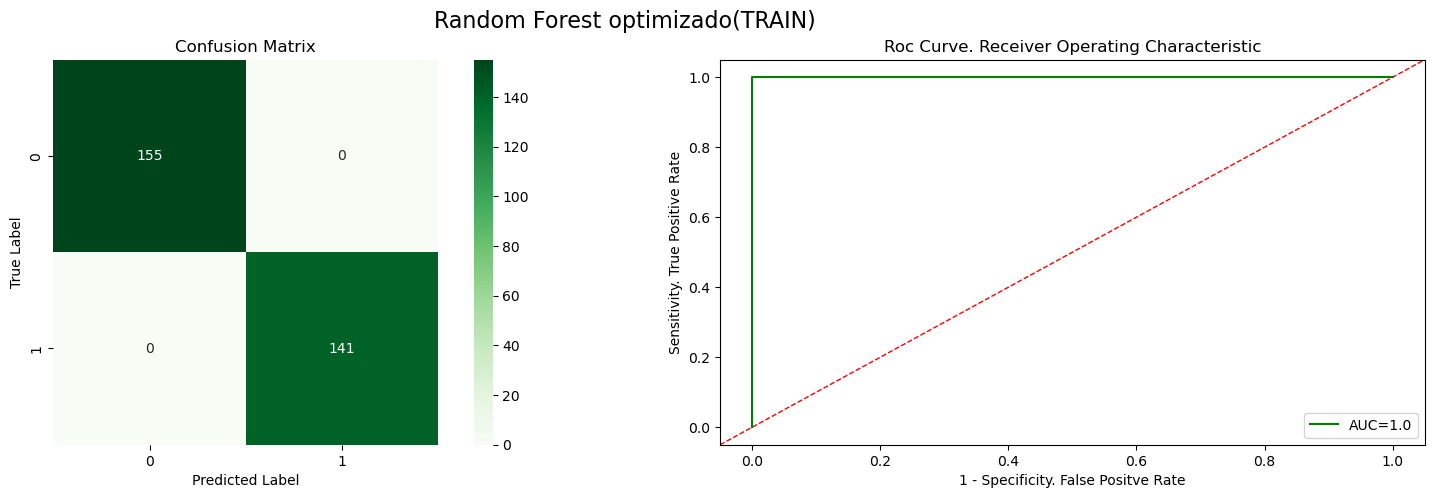

METRICS Random Forest optimizado(TRAIN)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 1.0
(precision) P= TP / TP + FP). precision_score 1.0
(sensibilidad) R = TP / (TP + FN). recall_score 1.0
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 1.0
(Area Under Curve) AUC: 1.0


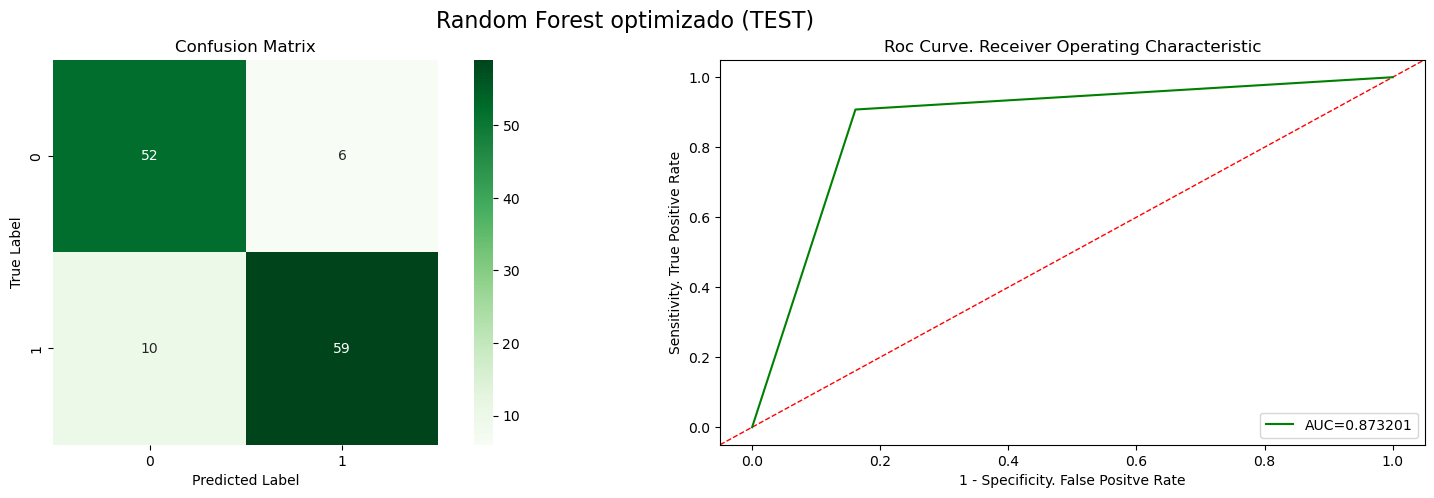

METRICS Random Forest optimizado (TEST)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8740157480314961
(precision) P= TP / TP + FP). precision_score 0.855072463768116
(sensibilidad) R = TP / (TP + FN). recall_score 0.9076923076923077
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8805970149253731
(Area Under Curve) AUC: 0.8732009925558312


In [64]:
draw_cm_and_roc_curve(y_preds_train_xg, y_train,"Random Forest optimizado(TRAIN)")
draw_cm_and_roc_curve(y_preds_test_xg, y_test,"Random Forest optimizado (TEST)")

In [66]:
y_preds_train_rf_tree_final_prob = rf_tree_final_model.predict_proba(x_train_std)[:,-1]
y_preds_test_rf_tree_final_prob = rf_tree_final_model.predict_proba(x_test_std)[:,-1]
y_preds_test_rf_tree_final_prob

In [ ]:
import pickle
filename = 'models/arandanos_rf_tree.pkl'
pickle.dump(rf_tree_final_model, open(filename,'wb'))

## 💡. SVM AUC

* **Modelo  optimizado**

In [67]:
cls_svm = SVC(random_state=0,probability=True)

# Busqueda del mejor estimador
param_grid = {'kernel' : ['rbf','linear'],'gamma' :[0.01,0.1], 'C':[10,50]}
grid_search = GridSearchCV(estimator=cls_svm, param_grid=param_grid, cv=2)
grid_search.fit(x_train_std, y_train)


# Entrenamiento del estimador optimo
cls_svm_op = grid_search.best_estimator_
cls_svm_op.fit(x_train_std, y_train)

SVC(C=10, gamma=0.01, kernel='linear', probability=True, random_state=0)

* **Evaluación del modelo**

In [68]:
y_preds_train_svm = cls_svm_op.predict(x_train_std)
y_preds_test_svm = cls_svm_op.predict(x_test_std)

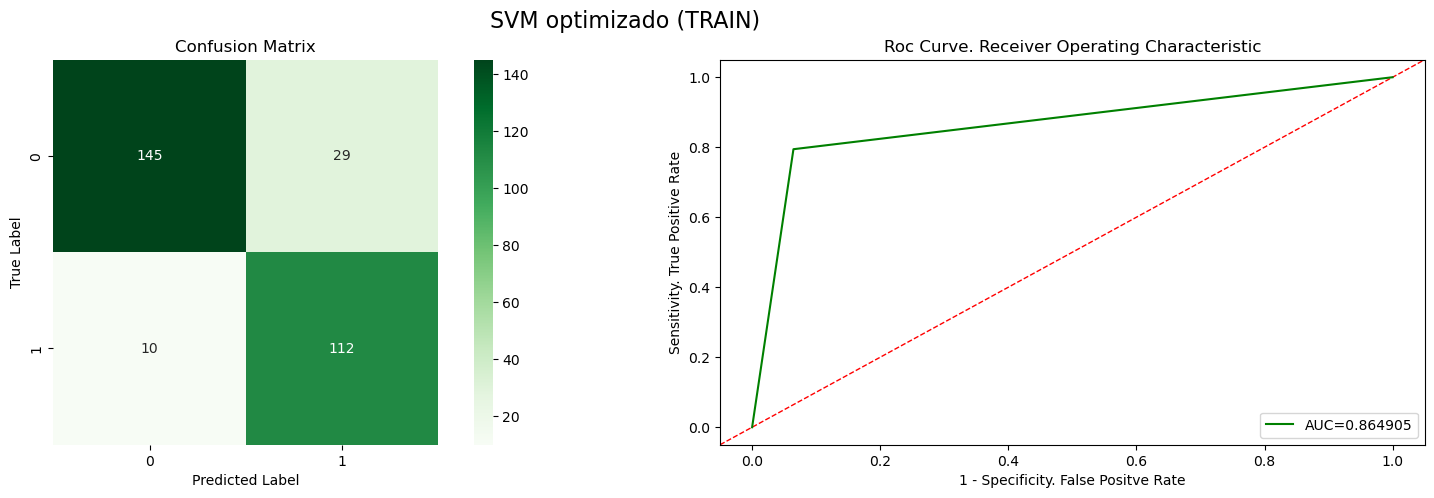

METRICS SVM optimizado (TRAIN)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8682432432432432
(precision) P= TP / TP + FP). precision_score 0.9180327868852459
(sensibilidad) R = TP / (TP + FN). recall_score 0.7943262411347518
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8517110266159698
(Area Under Curve) AUC: 0.8649050560512469


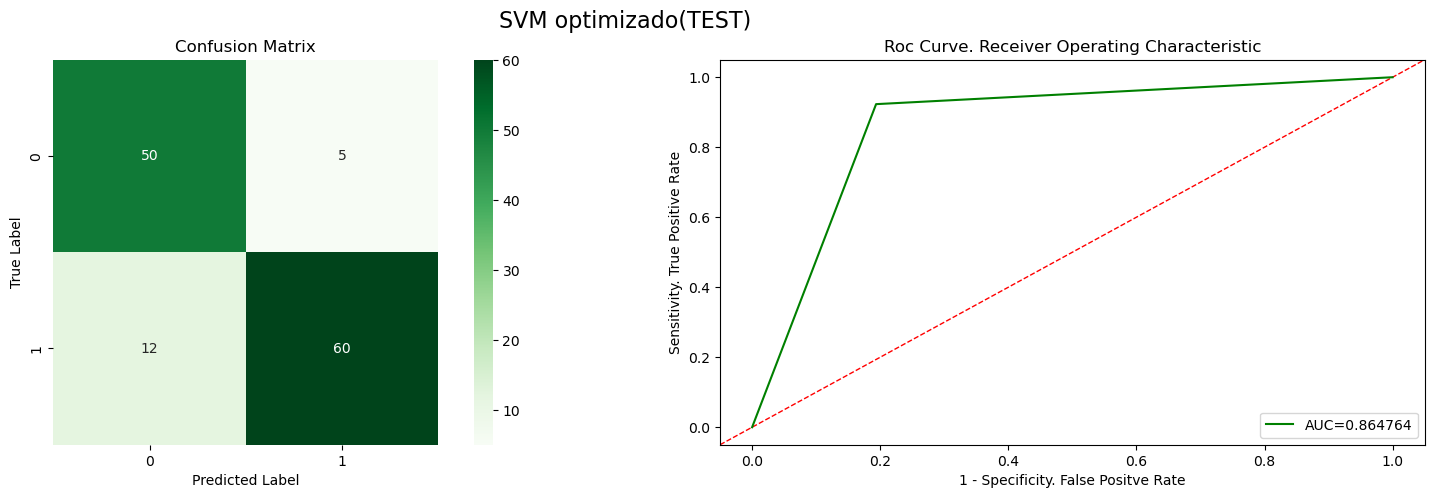

METRICS SVM optimizado(TEST)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8661417322834646
(precision) P= TP / TP + FP). precision_score 0.8333333333333334
(sensibilidad) R = TP / (TP + FN). recall_score 0.9230769230769231
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8759124087591241
(Area Under Curve) AUC: 0.8647642679900743


In [69]:
draw_cm_and_roc_curve(y_preds_train_svm, y_train,"SVM optimizado (TRAIN)")
draw_cm_and_roc_curve(y_preds_test_svm, y_test,"SVM optimizado(TEST)")

In [74]:
y_preds_train_cls_svm_op_prob = cls_svm_op.predict_proba(x_train_std)[:,-1]
y_preds_test_cls_svm_op_prob = cls_svm_op.predict_proba(x_test_std)[:,-1]

In [ ]:
import pickle
filename = 'models/arandanos_cls_svm_op.pkl'
pickle.dump(cls_svm_op, open(filename,'wb'))

## 💡. Regresion Logistica

* **Modelo  optimizado**

In [75]:
lg_clf = LogisticRegression(random_state=0).fit(x_train_std, y_train)

* **Evaluación del modelo**

In [76]:
pred_train_rl = lg_clf.predict(x_train_std)
pred_test_rl = lg_clf.predict(x_test_std)

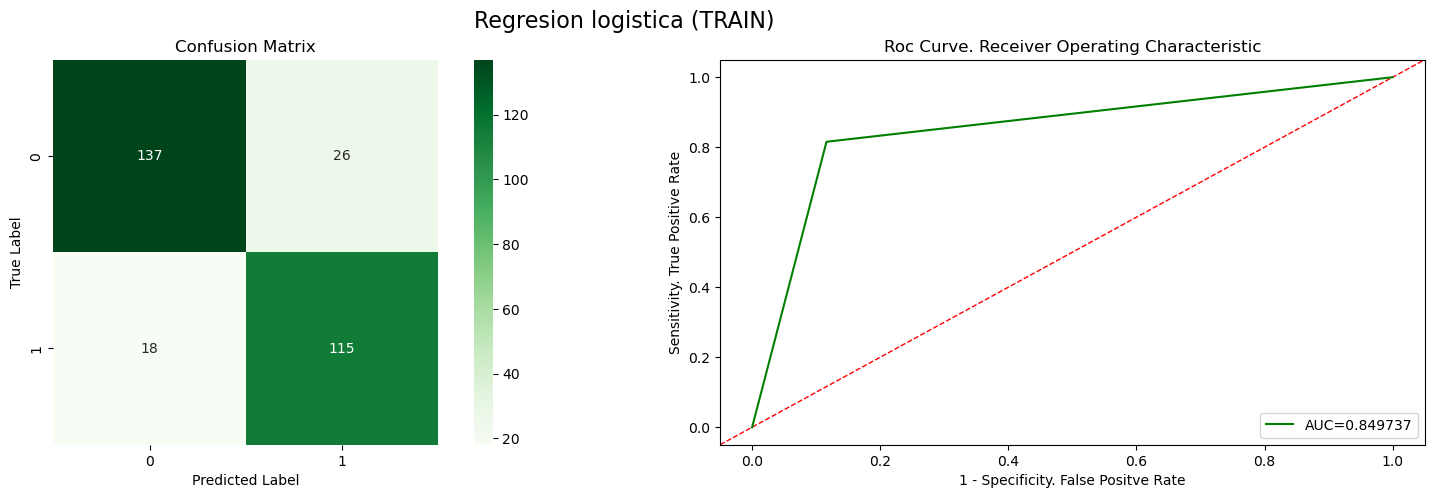

METRICS Regresion logistica (TRAIN)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8513513513513513
(precision) P= TP / TP + FP). precision_score 0.8646616541353384
(sensibilidad) R = TP / (TP + FN). recall_score 0.8156028368794326
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8394160583941607
(Area Under Curve) AUC: 0.8497369023106841


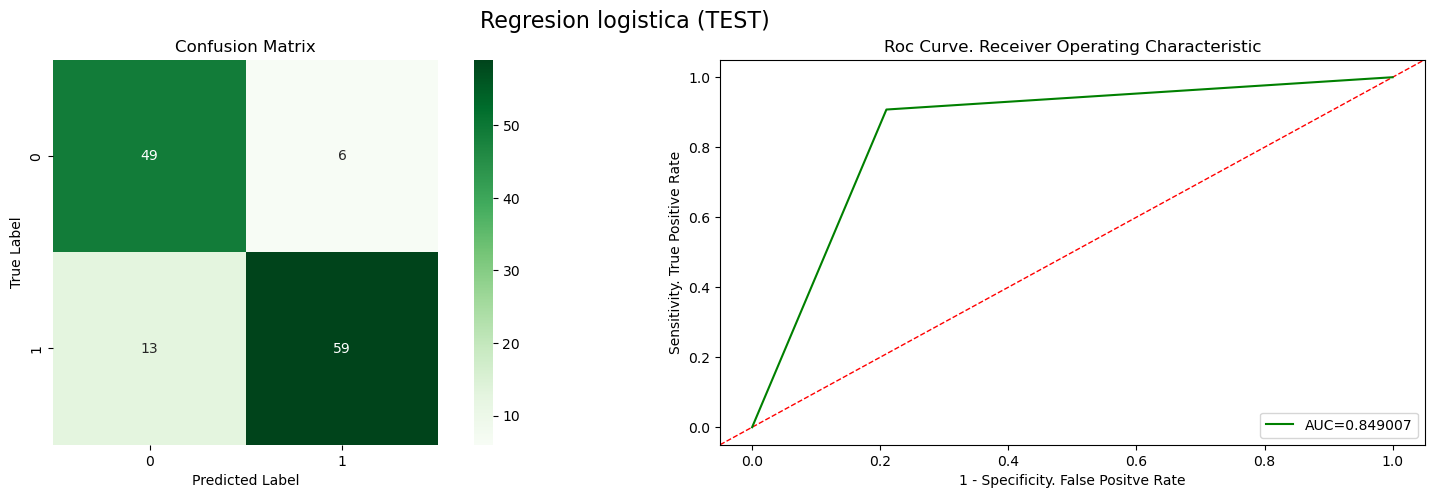

METRICS Regresion logistica (TEST)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8503937007874016
(precision) P= TP / TP + FP). precision_score 0.8194444444444444
(sensibilidad) R = TP / (TP + FN). recall_score 0.9076923076923077
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8613138686131386
(Area Under Curve) AUC: 0.8490074441687344


In [77]:
draw_cm_and_roc_curve(pred_train_rl, y_train,"Regresion logistica (TRAIN)")
draw_cm_and_roc_curve(pred_test_rl, y_test,"Regresion logistica (TEST)")

In [78]:
y_preds_train_lg_clf_prob = lg_clf.predict_proba(x_train_std)[:,-1]
y_preds_test_lg_clf_prob = lg_clf.predict_proba(x_test_std)[:,-1]

In [79]:
import pickle
filename = 'models/arandanos_lg_clf.pkl'
pickle.dump(lg_clf, open(filename,'wb'))

## 💡. KNN

* **Modelo  optimizado**

In [80]:
knn_cls = KNeighborsClassifier(n_neighbors=10)
# Busqueda del mejor estimador
param_grid = {'n_neighbors' : [5,10,20], 'weights': ['uniform', 'distance'], 'leaf_size':[10,30,50]}
grid_search = GridSearchCV(estimator=knn_cls, param_grid=param_grid, cv=5)
grid_search.fit(x_train_std, y_train)


# Entrenamiento del estimador optimo
knn_cls = grid_search.best_estimator_
knn_cls.fit(x_train_std, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=20)

* **Evaluación del modelo**

In [81]:
pred_train_knn = knn_cls.predict(x_train_std)
pred_test_knn = knn_cls.predict(x_test_std)

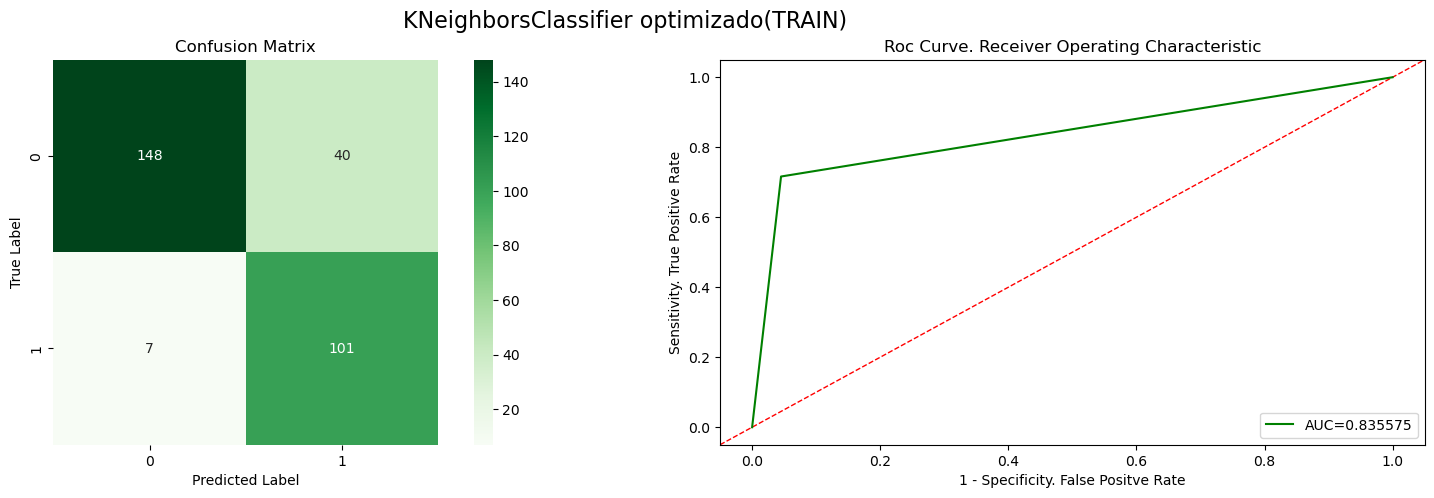

METRICS KNeighborsClassifier optimizado(TRAIN)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8412162162162162
(precision) P= TP / TP + FP). precision_score 0.9351851851851852
(sensibilidad) R = TP / (TP + FN). recall_score 0.7163120567375887
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8112449799196788
(Area Under Curve) AUC: 0.835575383207504


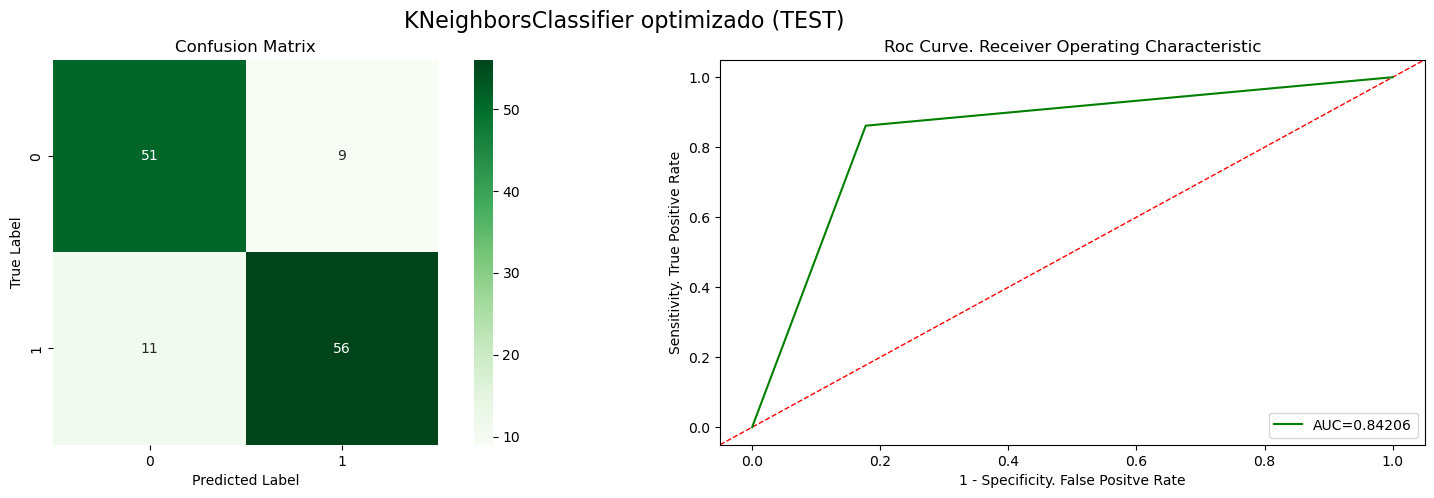

METRICS KNeighborsClassifier optimizado (TEST)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.84251968503937
(precision) P= TP / TP + FP). precision_score 0.835820895522388
(sensibilidad) R = TP / (TP + FN). recall_score 0.8615384615384616
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8484848484848485
(Area Under Curve) AUC: 0.8420595533498759


In [83]:
draw_cm_and_roc_curve(pred_train_knn, y_train,"KNeighborsClassifier optimizado(TRAIN)")
draw_cm_and_roc_curve(pred_test_knn, y_test,"KNeighborsClassifier optimizado (TEST)")

In [84]:
y_preds_train_knn_cls_prob = knn_cls.predict_proba(x_train_std)[:,-1]
y_preds_test_knn_cls_prob = knn_cls.predict_proba(x_test_std)[:,-1]
y_preds_test_knn_cls_prob

array([0.3 , 0.3 , 0.05, 0.65, 0.7 , 0.1 , 0.6 , 1.  , 0.4 , 0.2 , 0.25,
       0.95, 0.3 , 0.05, 0.  , 0.9 , 0.35, 0.15, 1.  , 0.6 , 0.4 , 0.55,
       0.15, 0.35, 0.2 , 1.  , 0.8 , 1.  , 0.6 , 0.55, 0.2 , 0.95, 0.2 ,
       1.  , 0.1 , 1.  , 0.35, 0.65, 0.95, 0.05, 1.  , 0.05, 0.15, 0.6 ,
       0.15, 0.15, 0.9 , 0.9 , 0.9 , 0.6 , 0.1 , 0.6 , 0.3 , 1.  , 0.5 ,
       0.2 , 1.  , 1.  , 0.5 , 0.05, 0.1 , 1.  , 0.85, 0.3 , 0.15, 0.15,
       0.9 , 0.7 , 0.2 , 0.9 , 0.9 , 1.  , 1.  , 0.95, 0.35, 0.25, 0.85,
       0.2 , 1.  , 0.25, 1.  , 0.75, 0.7 , 1.  , 0.95, 1.  , 0.25, 0.05,
       0.35, 0.25, 0.95, 0.1 , 0.95, 1.  , 1.  , 0.2 , 1.  , 0.85, 0.9 ,
       0.2 , 0.85, 0.5 , 0.25, 0.25, 0.4 , 0.  , 0.25, 0.65, 0.05, 1.  ,
       0.15, 0.75, 1.  , 0.15, 0.25, 1.  , 1.  , 1.  , 0.7 , 0.4 , 0.75,
       1.  , 0.95, 0.9 , 0.65, 0.2 , 0.2 ])

In [85]:
import pickle
filename = 'models/arandanos_knn_cls.pkl'
pickle.dump(knn_cls, open(filename,'wb'))

## 💡 Bagging AUC

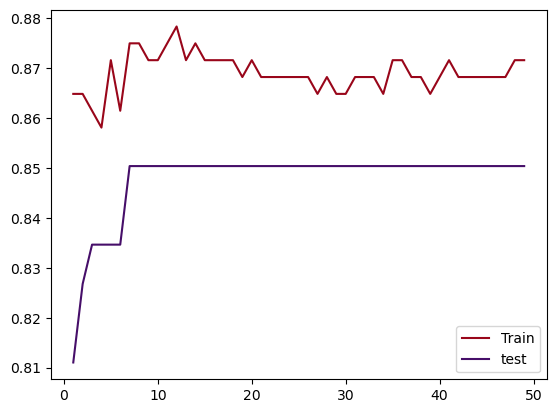

In [86]:
lista_acc_train = []
lista_acc_test = []
T=50 # estimadores
for n_estimador_t in range(1,T): 
  baggModel_exp = BaggingClassifier(estimator = rf_tree_final_model, n_estimators=n_estimador_t,random_state=0)
  baggModel_exp.fit(x_train_std, y_train)
  
  pred_train_exp = baggModel_exp.predict(x_train_std)
  predict_test_exp = baggModel_exp.predict(x_test_std)

  lista_acc_train.append(accuracy_score(pred_train_exp, y_train))
  lista_acc_test.append(accuracy_score(predict_test_exp, y_test))

plt.plot(range(1,T), lista_acc_train, label = "Train")
plt.plot(range(1,T), lista_acc_test, label = "test")
plt.legend()
plt.show()

In [87]:
T_best = 10
estimador_bagging =  rf_tree_final_model
baggModel = BaggingClassifier(base_estimator = estimador_bagging, n_estimators=T_best)
baggModel.fit(x_train_std, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=3,
                                                        n_estimators=10,
                                                        random_state=0))

In [88]:
pred_train_bagging = baggModel.predict(x_train_std)
pred_test_bagging = baggModel.predict(x_test_std)

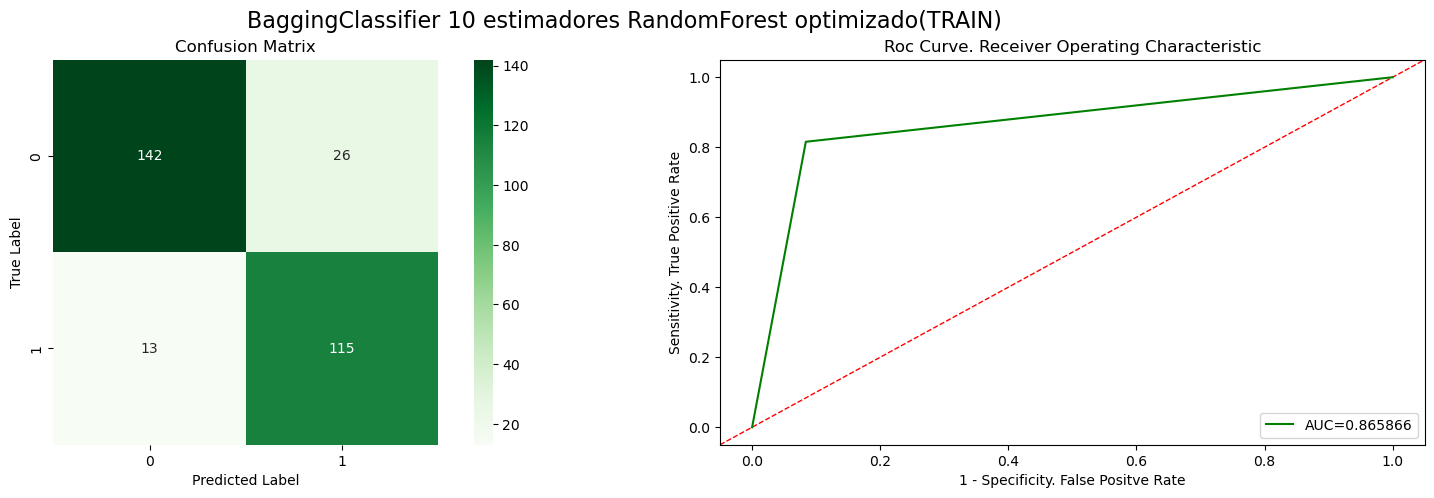

METRICS BaggingClassifier 10 estimadores RandomForest optimizado(TRAIN)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8682432432432432
(precision) P= TP / TP + FP). precision_score 0.8984375
(sensibilidad) R = TP / (TP + FN). recall_score 0.8156028368794326
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8550185873605947
(Area Under Curve) AUC: 0.8658659345687486


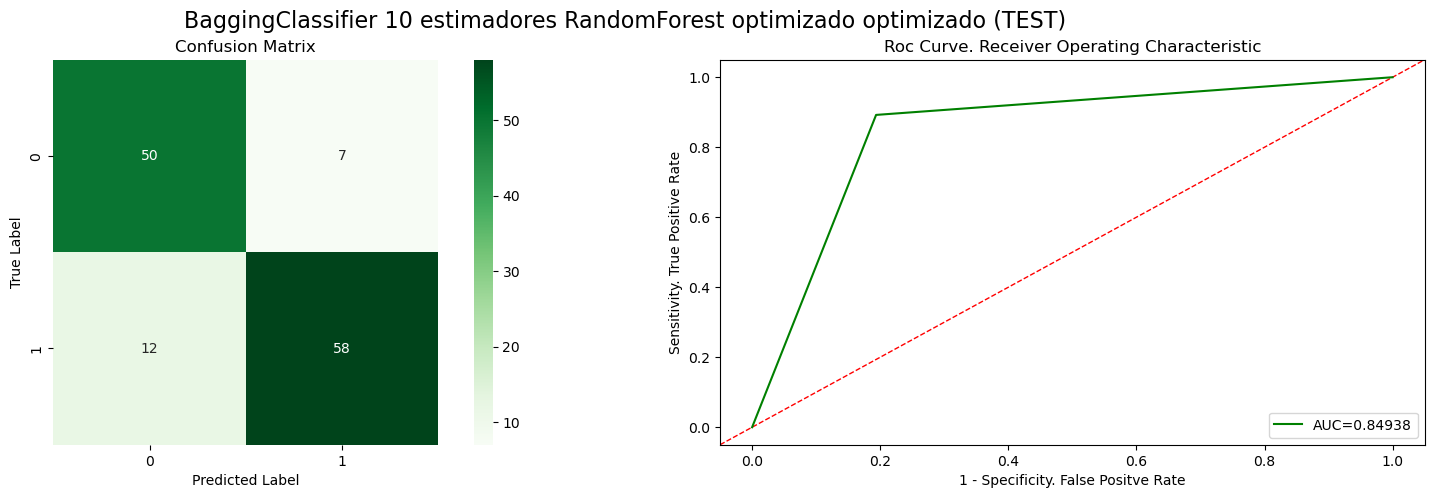

METRICS BaggingClassifier 10 estimadores RandomForest optimizado optimizado (TEST)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8503937007874016
(precision) P= TP / TP + FP). precision_score 0.8285714285714286
(sensibilidad) R = TP / (TP + FN). recall_score 0.8923076923076924
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8592592592592593
(Area Under Curve) AUC: 0.849379652605459


In [89]:
draw_cm_and_roc_curve(pred_train_bagging, y_train,"BaggingClassifier 10 estimadores RandomForest optimizado(TRAIN)")
draw_cm_and_roc_curve(pred_test_bagging, y_test,"BaggingClassifier 10 estimadores RandomForest optimizado optimizado (TEST)")

In [91]:
y_preds_train_baggModel_prob = baggModel.predict_proba(x_train_std)[:,-1]
y_preds_test_baggModel_prob = baggModel.predict_proba(x_test_std)[:,-1]

In [92]:
import pickle
filename = 'models/arandanos_bagging.pkl'
pickle.dump(baggModel, open(filename,'wb'))

## 💡. XGBClassifier

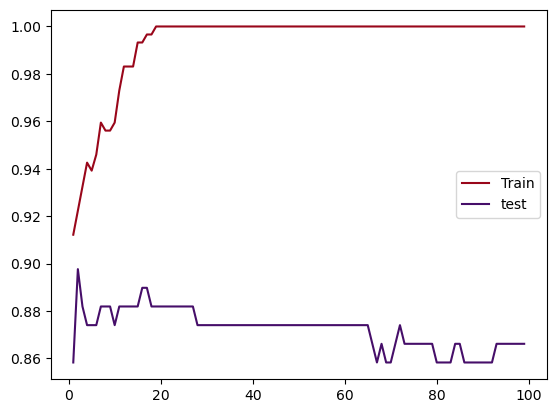

In [113]:
import xgboost as xgb

lista_acc_train = []
lista_acc_test = []
T=100 # estimadores

for n_estimador_t in range(1,T): 
  xgb_model_exp = xgb.XGBClassifier(n_estimators=n_estimador_t, max_depth=8,random_state=0)
  xgb_model_exp.fit(x_train_std, y_train)
  
  pred_train_exp = xgb_model_exp.predict(x_train_std)
  predict_test_exp = xgb_model_exp.predict(x_test_std)

  lista_acc_train.append(accuracy_score(pred_train_exp, y_train))
  lista_acc_test.append(accuracy_score(predict_test_exp, y_test))

plt.plot(range(1,T), lista_acc_train, label = "Train")
plt.plot(range(1,T), lista_acc_test, label = "test")
plt.legend()
plt.show()

In [114]:
max_index = lista_acc_test.index(max(lista_acc_test))
print("max_index",max_index)


max_index 1


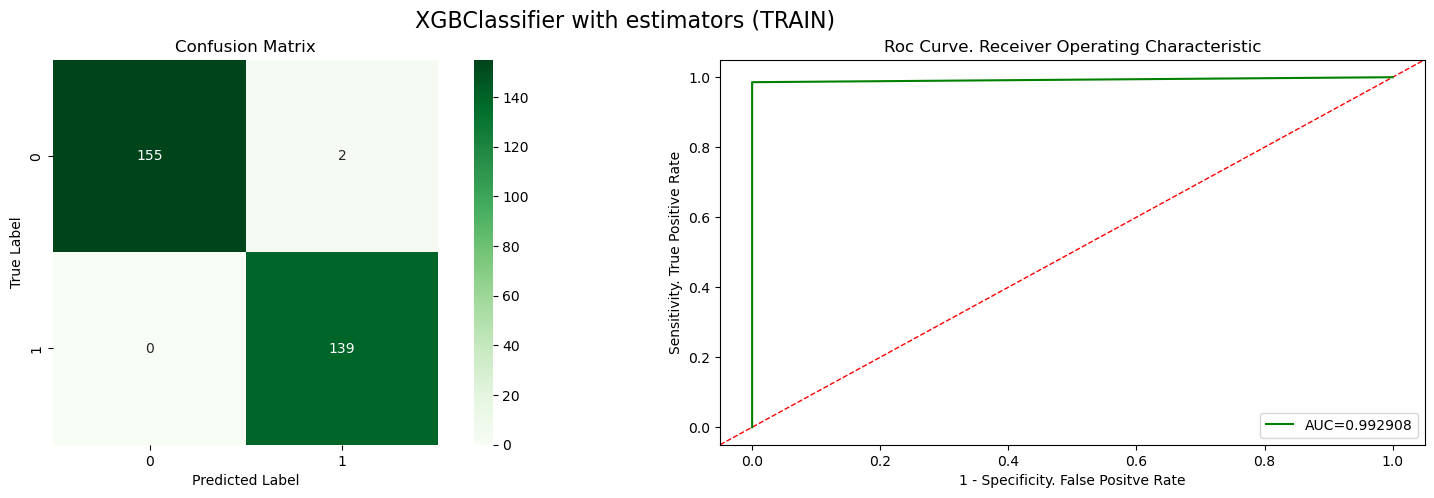

METRICS XGBClassifier with estimators (TRAIN)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.9932432432432432
(precision) P= TP / TP + FP). precision_score 1.0
(sensibilidad) R = TP / (TP + FN). recall_score 0.9858156028368794
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.9928571428571429
(Area Under Curve) AUC: 0.9929078014184397


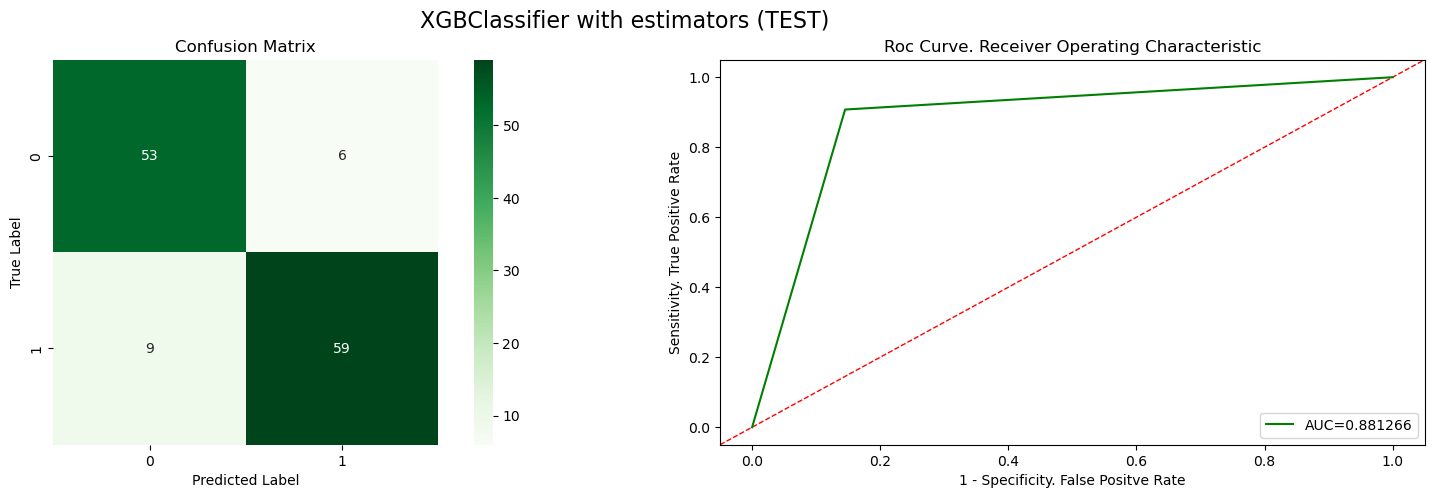

METRICS XGBClassifier with estimators (TEST)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8818897637795275
(precision) P= TP / TP + FP). precision_score 0.8676470588235294
(sensibilidad) R = TP / (TP + FN). recall_score 0.9076923076923077
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.887218045112782
(Area Under Curve) AUC: 0.8812655086848635


In [119]:
import xgboost as xgb

T_best = 15
xgb_model = xgb.XGBClassifier(n_estimators=T_best, max_depth=8)
xgb_model.fit(x_train_std, y_train)

# Prediction over train set
pred_train_v3 = xgb_model.predict(x_train_std)
draw_cm_and_roc_curve(pred_train_v3,y_train,"XGBClassifier with estimators (TRAIN)")

# Prediction over test set
pred_test_v3 = xgb_model.predict(x_test_std)
draw_cm_and_roc_curve(pred_test_v3,y_test,"XGBClassifier with estimators (TEST)")

In [121]:
y_preds_train_xgb_model_prob = xgb_model.predict_proba(x_train_std)[:,-1]
y_preds_test_xgb_model_prob = xgb_model.predict_proba(x_test_std)[:,-1]

In [122]:
import pickle
filename = 'models/arandanos_xgbclassifier.pkl'
pickle.dump(xgb_model, open(filename,'wb'))

## 💡. AdaBoostClassifier

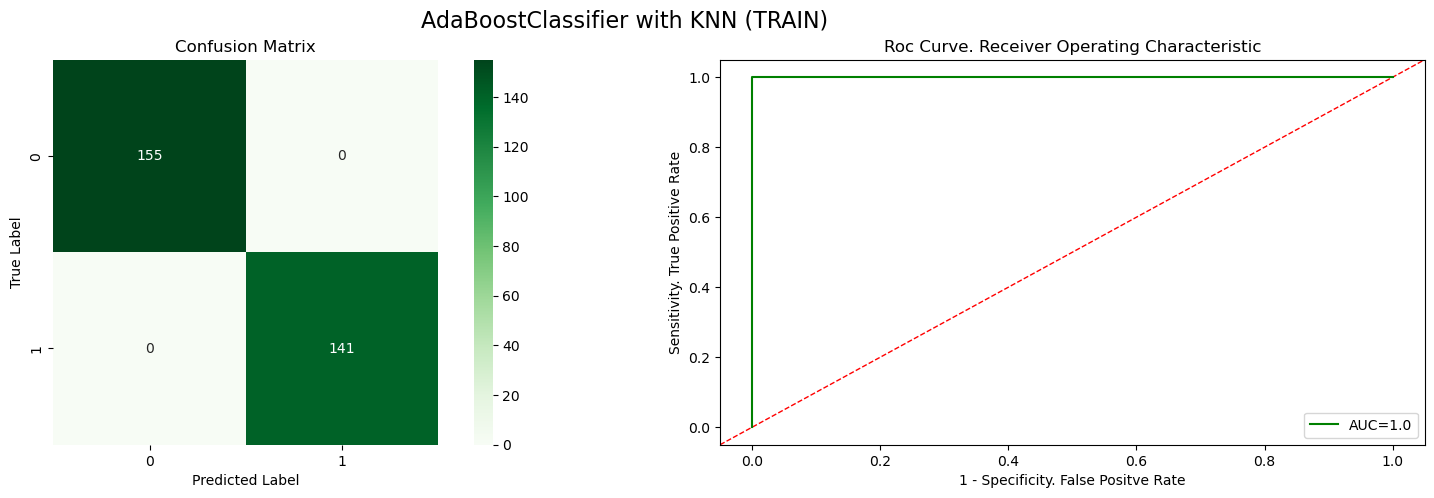

METRICS AdaBoostClassifier with KNN (TRAIN)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 1.0
(precision) P= TP / TP + FP). precision_score 1.0
(sensibilidad) R = TP / (TP + FN). recall_score 1.0
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 1.0
(Area Under Curve) AUC: 1.0


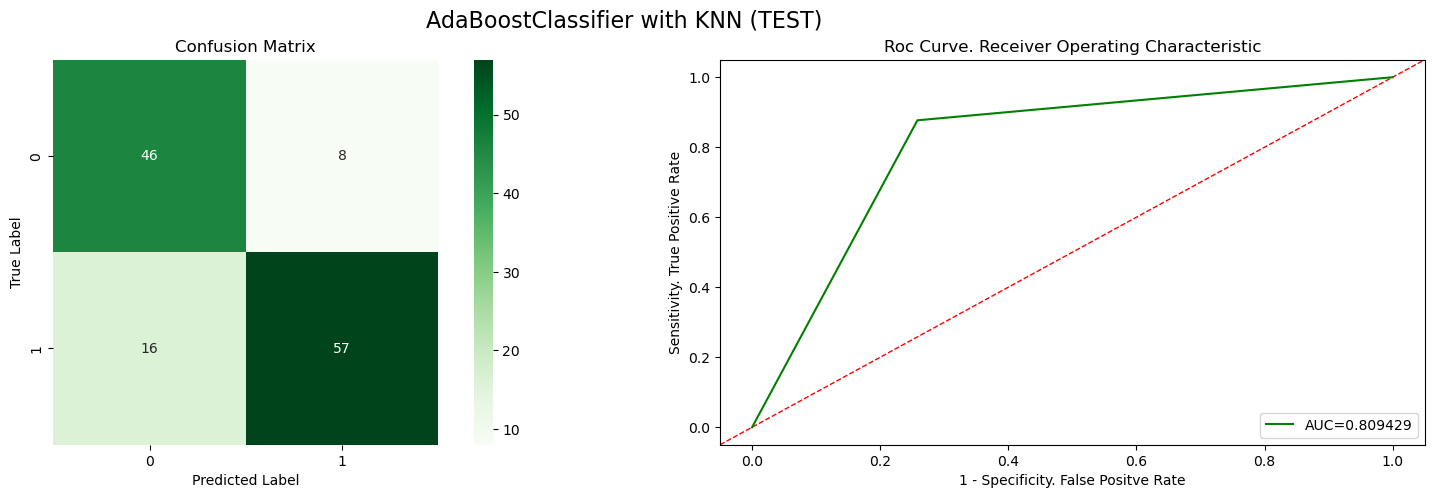

METRICS AdaBoostClassifier with KNN (TEST)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8110236220472441
(precision) P= TP / TP + FP). precision_score 0.7808219178082192
(sensibilidad) R = TP / (TP + FN). recall_score 0.8769230769230769
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8260869565217391
(Area Under Curve) AUC: 0.8094292803970223


In [127]:
ada_cls = AdaBoostClassifier(estimator=dtree_final_model , n_estimators=100)
ada_cls.fit(x_train_std, np.ravel(y_train))

# Prediction over train set
pred_train_ada_cls = ada_cls.predict(x_train_std)
draw_cm_and_roc_curve(pred_train_ada_cls,y_train,"AdaBoostClassifier with KNN (TRAIN)")

# Prediction over test set
pred_test_ada_cls = ada_cls.predict(x_test_std)
draw_cm_and_roc_curve(pred_test_ada_cls,y_test,"AdaBoostClassifier with KNN (TEST)")

In [128]:
y_preds_train_ada_cls_prob = ada_cls.predict_proba(x_train_std)[:,-1]
y_preds_test_ada_cls_prob = ada_cls.predict_proba(x_test_std)[:,-1]

In [129]:
import pickle
filename = 'models/arandanos_ada_cls.pkl'
pickle.dump(ada_cls, open(filename,'wb'))

## 💡. Stacking

In [130]:
from sklearn.ensemble import StackingClassifier

In [131]:
estimadores_base=[("rf_opt", rf_tree_final_model),
                  ('knn_opt', knn_cls),
                  ('svc_opt', cls_svm_op)]

estimadores_base=[("rf_opt", rf_tree_final_model),
                  ('svc_opt', cls_svm_op)]

In [132]:
# estimador final
estimador_final = rf_tree_final_model

In [133]:
stack = StackingClassifier(estimators=estimadores_base, final_estimator=estimador_final)
stack.fit(x_train_std, np.ravel(y_train))

StackingClassifier(estimators=[('rf_opt',
                                RandomForestClassifier(max_depth=3,
                                                       n_estimators=10,
                                                       random_state=0)),
                               ('svc_opt',
                                SVC(C=10, gamma=0.01, kernel='linear',
                                    probability=True, random_state=0))],
                   final_estimator=RandomForestClassifier(max_depth=3,
                                                          n_estimators=10,
                                                          random_state=0))

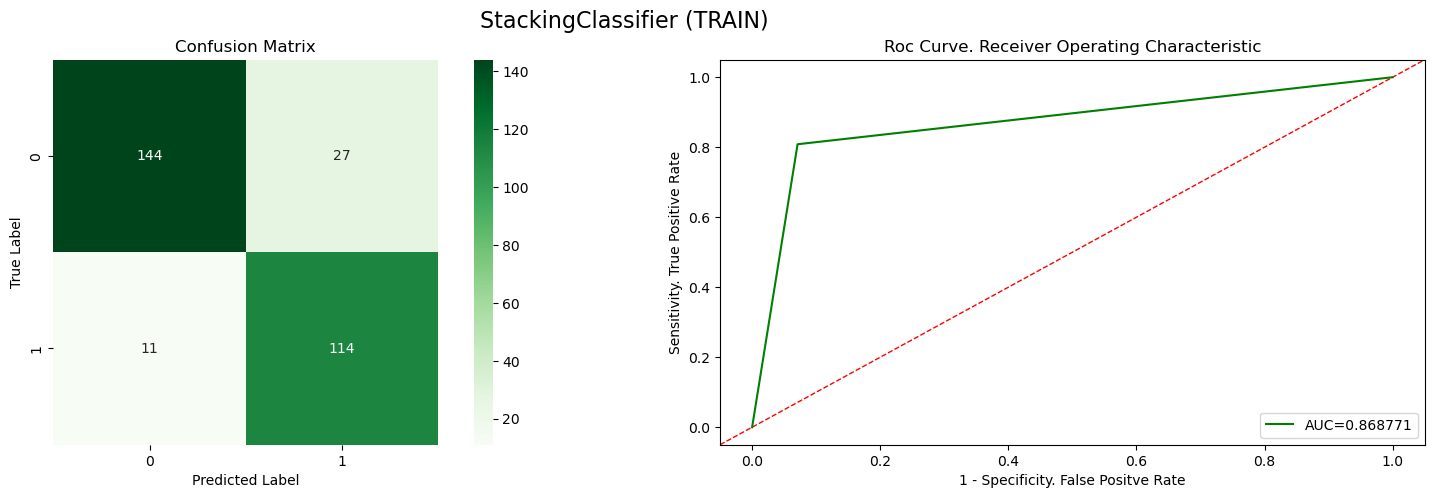

METRICS StackingClassifier (TRAIN)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8716216216216216
(precision) P= TP / TP + FP). precision_score 0.912
(sensibilidad) R = TP / (TP + FN). recall_score 0.8085106382978723
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8571428571428571
(Area Under Curve) AUC: 0.8687714481811943


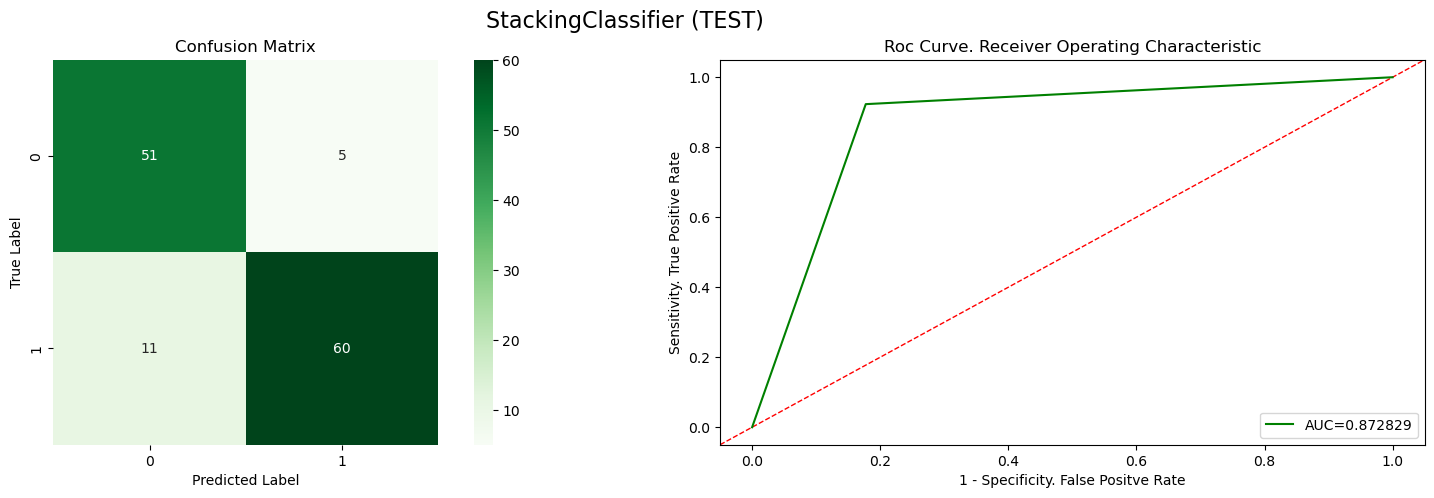

METRICS StackingClassifier (TEST)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8740157480314961
(precision) P= TP / TP + FP). precision_score 0.8450704225352113
(sensibilidad) R = TP / (TP + FN). recall_score 0.9230769230769231
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8823529411764706
(Area Under Curve) AUC: 0.8728287841191067


In [135]:
# Prediction over train set
pred_train_stack = stack.predict(x_train_std)
draw_cm_and_roc_curve(pred_train_stack, y_train,"StackingClassifier (TRAIN)")

# Prediction over test set
pred_test_stack = stack.predict(x_test_std)
draw_cm_and_roc_curve(pred_test_stack, y_test,"StackingClassifier (TEST)")

In [136]:
y_preds_train_stack_prob = stack.predict_proba(x_train_std)[:,-1]
y_preds_test_stack_prob = stack.predict_proba(x_test_std)[:,-1]


In [137]:
import pickle
filename = 'models/arandanos_stack.pkl'
pickle.dump(stack, open(filename,'wb'))

## 💡 Red Neuronal

**Entrenar red neuronal**

In [143]:
neural_network = MLPClassifier(solver='adam',learning_rate_init= 0.01,activation='relu', momentum=0, random_state=1, early_stopping= True, shuffle=True, max_iter=500)
neural_network.fit(x_train_std,y_train)

MLPClassifier(early_stopping=True, learning_rate_init=0.01, max_iter=500,
              momentum=0, random_state=1)

* **Evaluación del modelo**

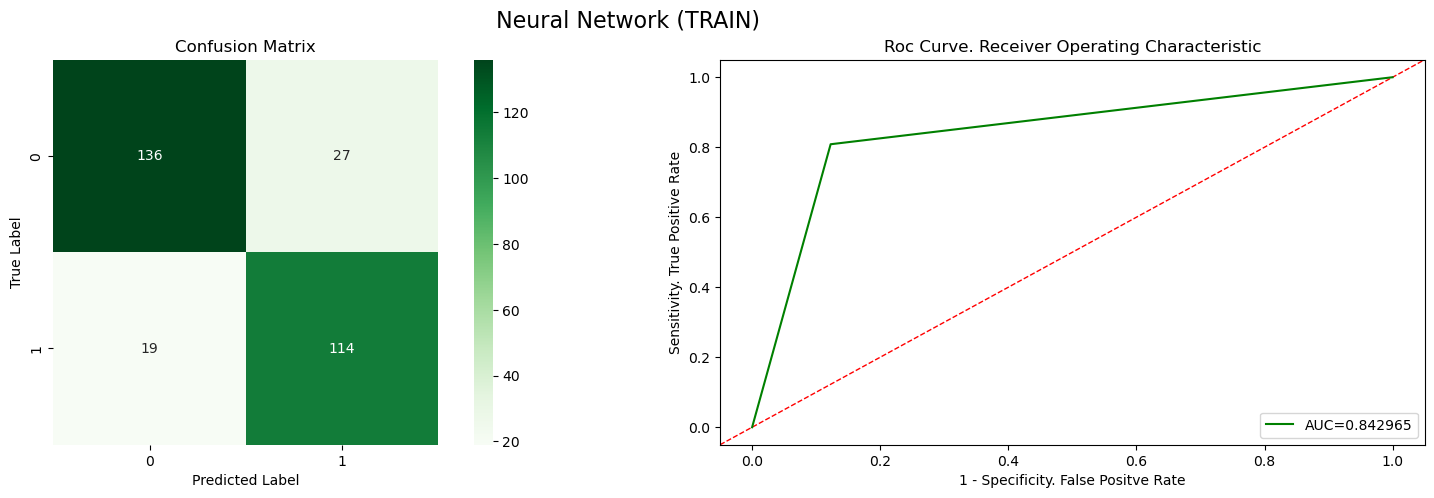

METRICS  Neural Network (TRAIN)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.8445945945945946
(precision) P= TP / TP + FP). precision_score 0.8571428571428571
(sensibilidad) R = TP / (TP + FN). recall_score 0.8085106382978723
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8321167883211678
(Area Under Curve) AUC: 0.842964996568291


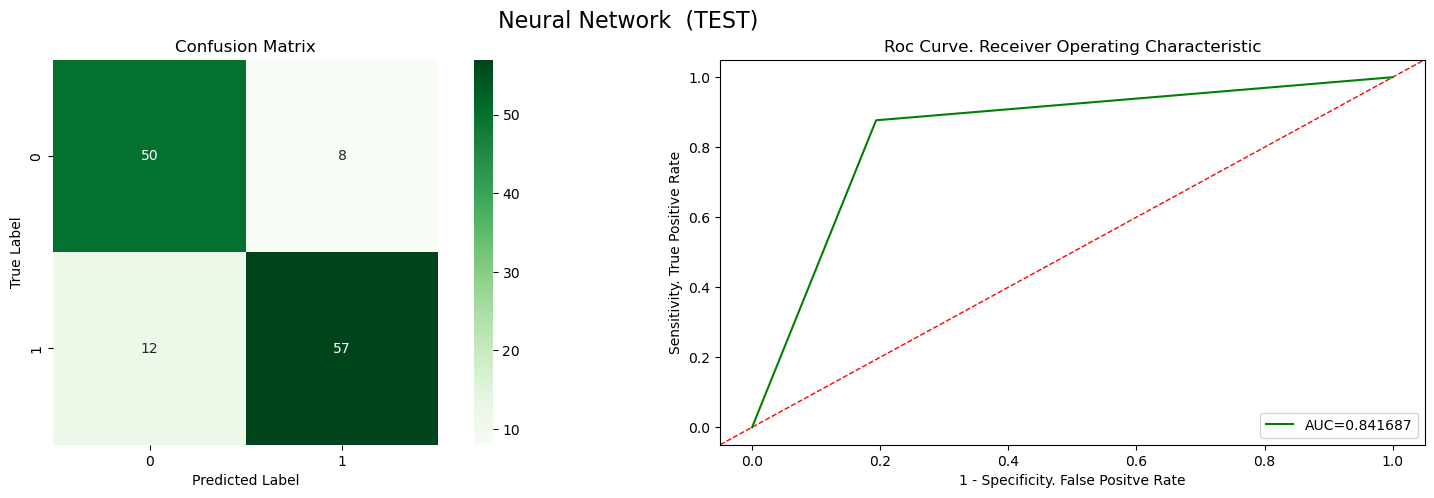

METRICS  Neural Network  (TEST)

-------------------------------------------------------------------------------------------
(exactiud) A = (TP + TN) / (TP + TN + FP + FN).  accuracy_score: 0.84251968503937
(precision) P= TP / TP + FP). precision_score 0.8260869565217391
(sensibilidad) R = TP / (TP + FN). recall_score 0.8769230769230769
(f1-score) F1 = F1 = 2 * ((recall * precision)/(recall + precision)). f1_score: 0.8507462686567164
(Area Under Curve) AUC: 0.8416873449131512


In [144]:
#train
preds_y_train_red = neural_network.predict(x_train_std)

# test
preds_y_test_red = neural_network.predict(x_test_std)

draw_cm_and_roc_curve(preds_y_train_red, y_train," Neural Network (TRAIN)")
draw_cm_and_roc_curve(preds_y_test_red, y_test," Neural Network  (TEST)")

In [145]:
print("Training set score: %f" % neural_network.score(x_train_std, y_train))
print("Training set loss: %f" % neural_network.loss_)

Training set score: 0.844595
Training set loss: 0.367492


In [147]:
y_preds_neural_network_prob = neural_network.predict_proba(x_train_std)[:,-1]
y_preds_neural_network_prob = neural_network.predict_proba(x_test_std)[:,-1]

In [148]:
import pickle
filename = 'models/arandanos_neural_network.pkl'
pickle.dump(neural_network, open(filename,'wb'))

# 🦄 Welcome Datathon!

**Dataset de la datathon**

**Traduccion de etiquetas B = 1 y A = 0**

In [151]:
path = 'C:\\GFT\Projects\\Pilar\\vs_workspace\\repo\\datathon_datamecum\\data\\datos_validar_enviar.xlsx'
df_datathon = pd.read_excel(path)
df_datathon.head()

Area      Emayor      Emenor       Exc     Vol       Rat     Perim  \
0  222915  731.559406  389.946700  1.846093  227170  1.770543  1876.307   
1   85449  471.124664  238.328679  1.862609   89794  1.584770  1246.200   
2   56903  360.815292  204.037706  1.824755   59797  1.718427   980.390   
3   58650  346.338958  219.684365  1.773083   62380  1.660287   991.612   
4   36113  257.641853  181.157079  1.711056   37442  1.694481   737.637   

   salida  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [152]:
df_datathon.head()

Area      Emayor      Emenor       Exc     Vol       Rat     Perim  \
0  222915  731.559406  389.946700  1.846093  227170  1.770543  1876.307   
1   85449  471.124664  238.328679  1.862609   89794  1.584770  1246.200   
2   56903  360.815292  204.037706  1.824755   59797  1.718427   980.390   
3   58650  346.338958  219.684365  1.773083   62380  1.660287   991.612   
4   36113  257.641853  181.157079  1.711056   37442  1.694481   737.637   

   salida  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [155]:
Z = df_datathon.iloc[:,df_datathon.columns !='salida']
Z_std = std.transform(Z)
print("Variables predictoras test datathon:",Z.columns)
print("Tamaño del test datathon", Z.shape)

Variables predictoras test datathon: Index(['Area', 'Emayor', 'Emenor', 'Exc', 'Vol', 'Rat', 'Perim'], dtype='object')
Tamaño del test datathon (180, 7)


## ◾ Opinion 1: **HistGradientBoostingClassifier**

Aunque el modelo tiene en algunas predicciones poca confianza, es un modelo que ha obtenido buenas métricas en la auc y f1.

In [164]:
xgdtree

HistGradientBoostingClassifier(random_state=0)

In [160]:
y_pred_datathon_test = xgdtree.predict(Z_std) #HistGradientBoostingClassifier
y_pred_datathon_test_prob =xgdtree.predict_proba(Z_std)[:,1] # HistGradientBoostingClassifier prob

In [161]:
df_datathon['xgdtree_salida'] = y_pred_datathon_test # xgdtree HistGradientBoostingClassifier
df_datathon['xgdtree_prob'] = y_pred_datathon_test_prob # xgdtree  HistGradientBoostingClassifier prob
df_datathon.head()

Area      Emayor      Emenor       Exc     Vol       Rat     Perim  \
0  222915  731.559406  389.946700  1.846093  227170  1.770543  1876.307   
1   85449  471.124664  238.328679  1.862609   89794  1.584770  1246.200   
2   56903  360.815292  204.037706  1.824755   59797  1.718427   980.390   
3   58650  346.338958  219.684365  1.773083   62380  1.660287   991.612   
4   36113  257.641853  181.157079  1.711056   37442  1.694481   737.637   

   salida  xgdtree_salida  xgdtree_prob  
0     NaN               1      0.994052  
1     NaN               1      0.999450  
2     NaN               0      0.090739  
3     NaN               0      0.013834  
4     NaN               0      0.001156

Text(0.5, 1.0, 'Datathon: 180')

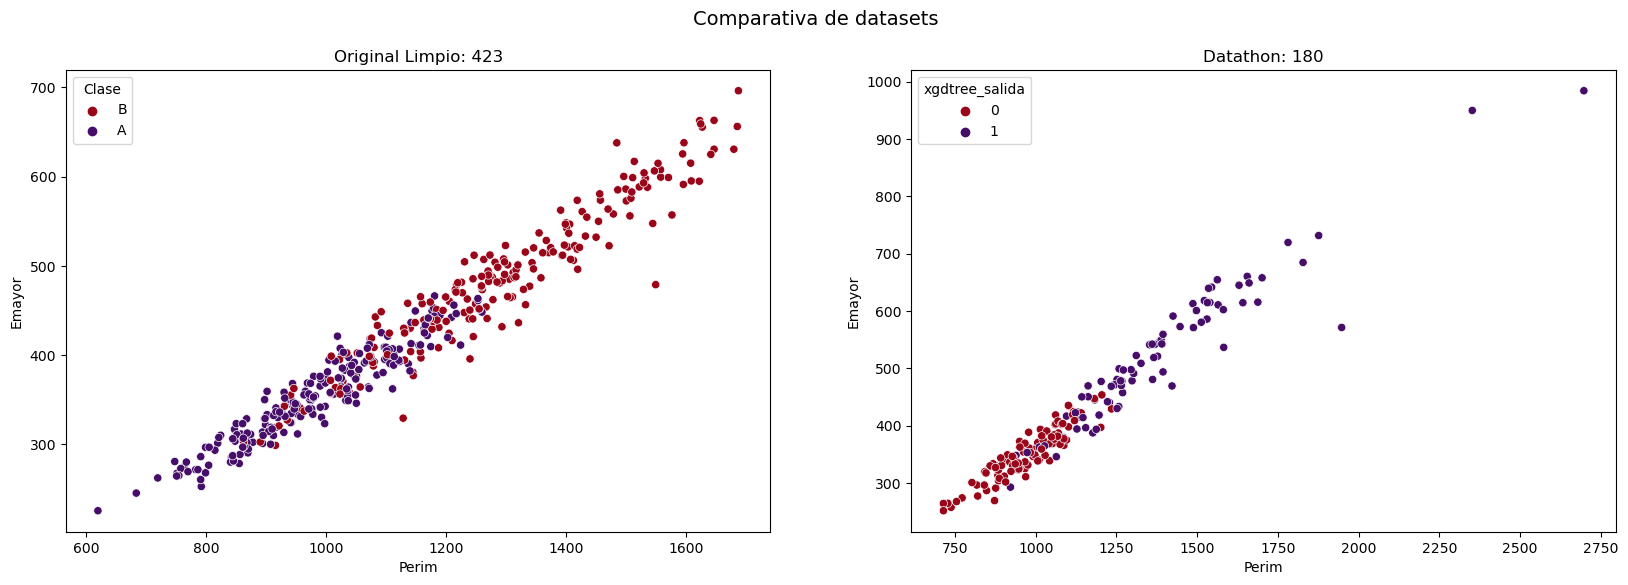

In [162]:
fig, axes = plt.subplots(1, 2,  figsize=(20, 6))
fig.suptitle("Comparativa de datasets",fontsize=14)

sns.scatterplot(ax = axes[0], data=df_selec, x='Perim', y='Emayor', hue='Clase')
axes[0].set_title("Original Limpio: {}".format(df_selec.shape[0]))

sns.scatterplot(ax = axes[1], data=df_datathon, x='Perim', y='Emayor', hue='xgdtree_salida')
axes[1].set_title("Datathon: {}".format(df_datathon.shape[0]))

## ◾ Opinion 2 **XGBClassifier**

In [163]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=15, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [165]:
y_pred_datathon_test_v2 = xgb_model.predict(Z_std) # xgb_model XGBClassifier
y_pred_datathon_test_v2_proba = xgb_model.predict_proba(Z_std)[:,1] # xgb_model XGBClassifier prob

In [166]:
df_datathon['xgb_model_salida'] = y_pred_datathon_test_v2 # xgb_model XGBClassifier 
df_datathon['xgb_model_prob'] = y_pred_datathon_test_v2_proba # xgb_model XGBClassifier prob
df_datathon.head()

Area      Emayor      Emenor       Exc     Vol       Rat     Perim  \
0  222915  731.559406  389.946700  1.846093  227170  1.770543  1876.307   
1   85449  471.124664  238.328679  1.862609   89794  1.584770  1246.200   
2   56903  360.815292  204.037706  1.824755   59797  1.718427   980.390   
3   58650  346.338958  219.684365  1.773083   62380  1.660287   991.612   
4   36113  257.641853  181.157079  1.711056   37442  1.694481   737.637   

   salida  xgdtree_salida  xgdtree_prob  xgb_model_salida  xgb_model_prob  
0     NaN               1      0.994052                 1        0.987917  
1     NaN               1      0.999450                 1        0.976780  
2     NaN               0      0.090739                 0        0.148434  
3     NaN               0      0.013834                 0        0.036460  
4     NaN               0      0.001156                 0        0.018770

Text(0.5, 1.0, 'HistGradientBoostingClassifier: 180')

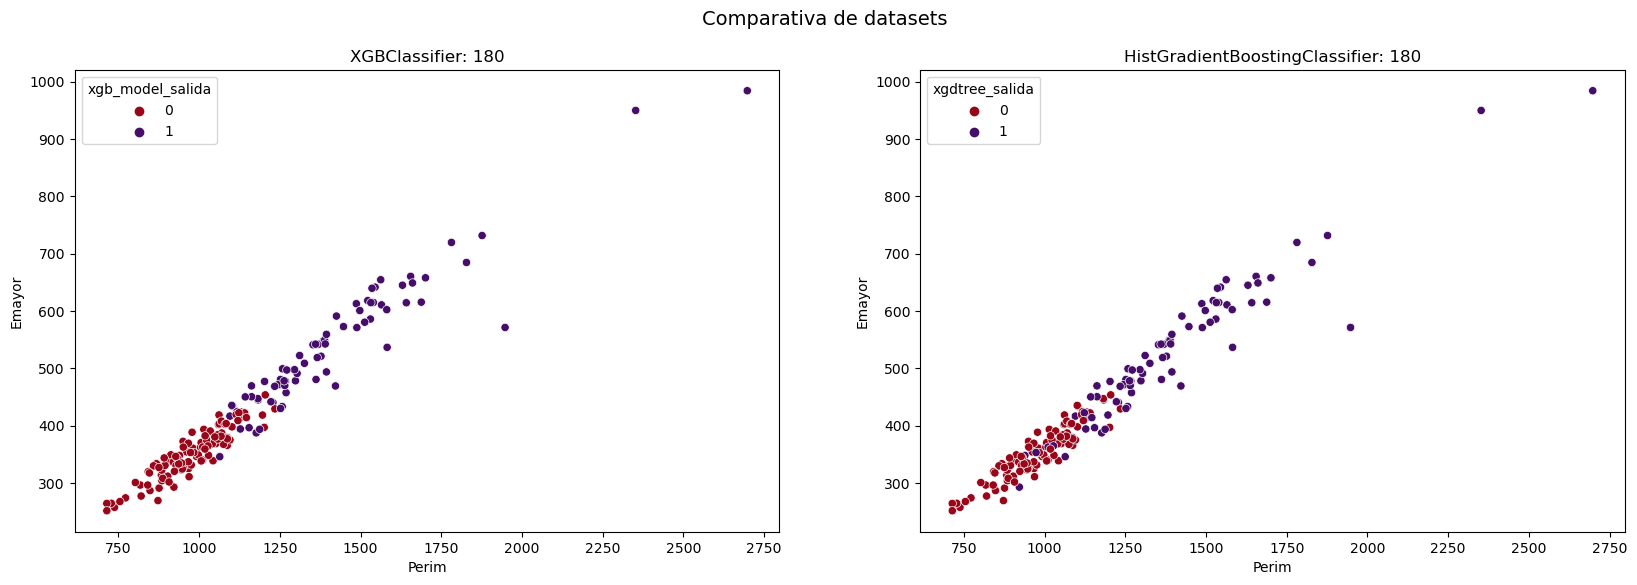

In [167]:
fig, axes = plt.subplots(1, 2,  figsize=(20, 6))
fig.suptitle("Comparativa de datasets",fontsize=14)

sns.scatterplot(ax = axes[0], data=df_datathon, x='Perim', y='Emayor', hue='xgb_model_salida')
axes[0].set_title("XGBClassifier: {}".format(df_datathon.shape[0]))

sns.scatterplot(ax = axes[1], data=df_datathon, x='Perim', y='Emayor', hue='xgdtree_salida')
axes[1].set_title("HistGradientBoostingClassifier: {}".format(df_datathon.shape[0]))

## ◾ Opinion 3: RandomForest

**Comparativa HistGradientBoostingClassifier vs Random Forest**

In [169]:
rf_tree_final_model

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

In [170]:
y_pred_datathon_test_v3 = rf_tree_final_model.predict(Z_std) # rf_tree RandomForestClassifier 
y_pred_datathon_test_v3_prob = rf_tree_final_model.predict_proba(Z_std)[:,1] #rf_tree RandomForestClassifier prob

In [171]:
df_datathon['rf_tree_salida'] = y_pred_datathon_test_v3 # rf_tree RandomForestClassifier 
df_datathon['rf_tree_prob'] = y_pred_datathon_test_v3_prob #rf_tree RandomForestClassifier prob
df_datathon.head()

Area      Emayor      Emenor       Exc     Vol       Rat     Perim  \
0  222915  731.559406  389.946700  1.846093  227170  1.770543  1876.307   
1   85449  471.124664  238.328679  1.862609   89794  1.584770  1246.200   
2   56903  360.815292  204.037706  1.824755   59797  1.718427   980.390   
3   58650  346.338958  219.684365  1.773083   62380  1.660287   991.612   
4   36113  257.641853  181.157079  1.711056   37442  1.694481   737.637   

   salida  xgdtree_salida  xgdtree_prob  xgb_model_salida  xgb_model_prob  \
0     NaN               1      0.994052                 1        0.987917   
1     NaN               1      0.999450                 1        0.976780   
2     NaN               0      0.090739                 0        0.148434   
3     NaN               0      0.013834                 0        0.036460   
4     NaN               0      0.001156                 0        0.018770   

   rf_tree_salida  rf_tree_prob  
0               1      0.989977  
1               1      0.933810  
2               0      0.145105  
3               0      0.116955  
4               0      0.085940

Text(0.5, 1.0, 'HistGradientBoostingClassifier: 180')

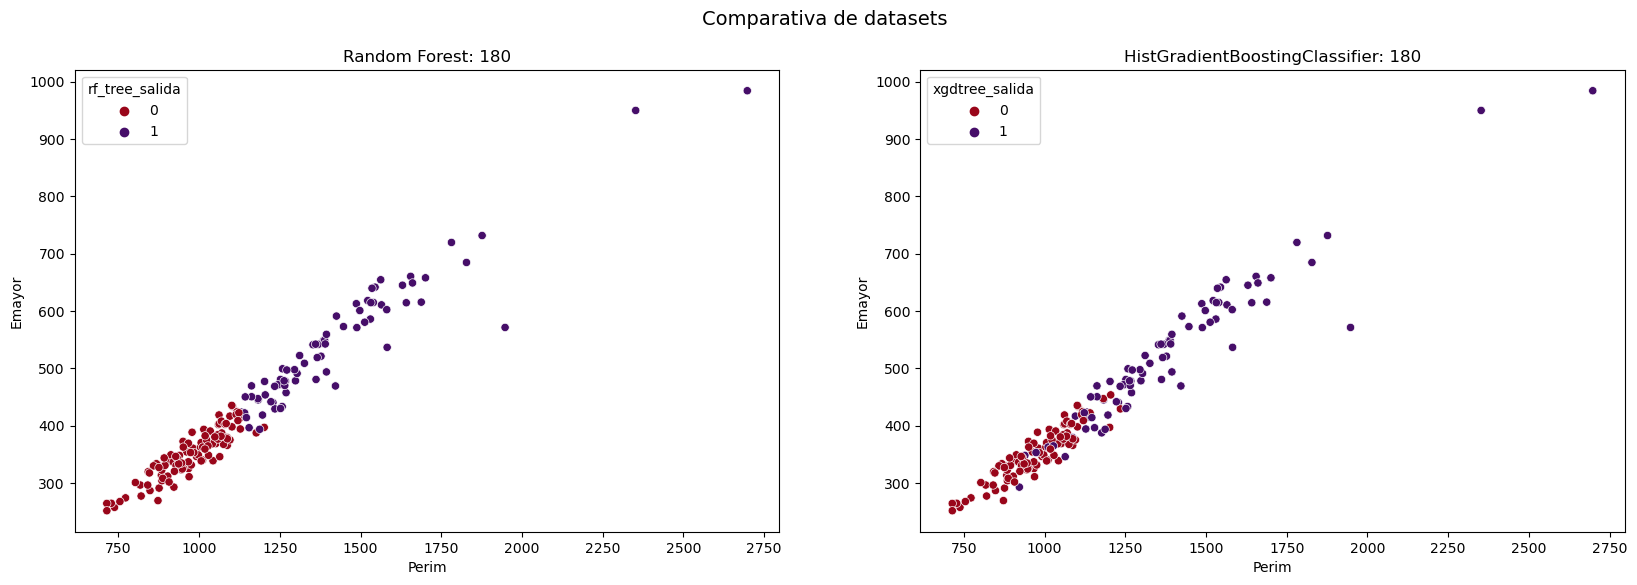

In [172]:
fig, axes = plt.subplots(1, 2,  figsize=(20, 6))
fig.suptitle("Comparativa de datasets",fontsize=14)

sns.scatterplot(ax = axes[0], data=df_datathon, x='Perim', y='Emayor', hue='rf_tree_salida')
axes[0].set_title("Random Forest: {}".format(df_datathon.shape[0]))

sns.scatterplot(ax = axes[1], data=df_datathon, x='Perim', y='Emayor', hue='xgdtree_salida')
axes[1].set_title("HistGradientBoostingClassifier: {}".format(df_datathon.shape[0]))

In [181]:
df_datathon.to_excel("reports\\all.xlsx")

# 📈 Resultados

In [178]:
df_datathon.head()

Area      Emayor      Emenor       Exc     Vol       Rat     Perim  \
0  222915  731.559406  389.946700  1.846093  227170  1.770543  1876.307   
1   85449  471.124664  238.328679  1.862609   89794  1.584770  1246.200   
2   56903  360.815292  204.037706  1.824755   59797  1.718427   980.390   
3   58650  346.338958  219.684365  1.773083   62380  1.660287   991.612   
4   36113  257.641853  181.157079  1.711056   37442  1.694481   737.637   

   salida  xgdtree_salida  xgdtree_prob  xgb_model_salida  xgb_model_prob  \
0     NaN               1      0.994052                 1        0.987917   
1     NaN               1      0.999450                 1        0.976780   
2     NaN               0      0.090739                 0        0.148434   
3     NaN               0      0.013834                 0        0.036460   
4     NaN               0      0.001156                 0        0.018770   

   rf_tree_salida  rf_tree_prob  
0               1      0.989977  
1               1      0.933810  
2               0      0.145105  
3               0      0.116955  
4               0      0.085940

In [179]:
df_datathon_report = df_datathon[['Area','Emayor','Emenor','Exc','Vol','Rat','Perim','salida']].copy()
df_datathon_report.head()

Area      Emayor      Emenor       Exc     Vol       Rat     Perim  \
0  222915  731.559406  389.946700  1.846093  227170  1.770543  1876.307   
1   85449  471.124664  238.328679  1.862609   89794  1.584770  1246.200   
2   56903  360.815292  204.037706  1.824755   59797  1.718427   980.390   
3   58650  346.338958  219.684365  1.773083   62380  1.660287   991.612   
4   36113  257.641853  181.157079  1.711056   37442  1.694481   737.637   

   salida  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [182]:
df_datathon_report['salida'] = df_datathon['xgdtree_salida']
df_datathon_report['prob'] = df_datathon['xgdtree_prob']
df_datathon_report.to_excel("reports\\Pilar_Madariaga_Bes1_Aes0_Datathon2023_proba.xlsx")